Import libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn import metrics

#Also import the classifiers 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

Read the necessary files. 

In [3]:
# skipping the necessary rows and reading the header
#life = pd.read_csv("C:/Users/dangu/OneDrive/Desktop/data201/LifeExpectancy.csv", skiprows=3, parse_dates=True)
steel = pd.read_csv("C:/Users/GGPC/Desktop/comp309/steel-plates-fault.csv")
ion = pd.read_csv("C:/Users/GGPC/Desktop/comp309/ionosphere.csv")
bank = pd.read_csv("C:/Users/GGPC/Desktop/comp309/banknote-authentication.csv")

In [4]:
steel.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,Class
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,1
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,1
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,1
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,1


In [5]:
ion.head()

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [6]:
bank.head()

,V1,V2,V3,V4,Class
0,3.62160,8.6661,-2.8073,-0.44699,1
1,4.54590,8.1674,-2.4586,-1.46210,1
2,3.86600,-2.6383,1.9242,0.10645,1
3,3.45660,9.5228,-4.0112,-3.59440,1
4,0.32924,-4.4552,4.5718,-0.98880,1


 The following code makes appropriate "fake data":

In [7]:
# making a fake data set here.
X, y = make_classification(n_features=20, n_redundant=0, n_informative=5, n_clusters_per_class=1)
rng = np.random.RandomState()
X += 4.0 * rng.uniform(size=X.shape)
myfakedataset = (X,y)
type(myfakedataset)


tuple

In [8]:
fake = pd.DataFrame(np.c_[X, y])
fake.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,2.273185,1.312389,1.239523,3.243668,1.005742,0.063058,2.745345,0.554413,-0.425189,1.854982,...,-1.717050,-0.370661,3.675584,2.111500,3.811497,-0.121119,5.169681,3.292638,1.275729,0.0
1,2.461971,3.935026,4.795971,3.794564,-0.090815,4.345649,4.848407,-0.089029,2.231055,2.847475,...,4.657792,-0.326707,4.045135,-0.288436,1.687454,3.041259,0.472301,-0.375574,-0.692070,1.0
2,3.828796,0.308870,2.245013,2.494188,2.651636,-1.464643,0.174089,1.624017,1.918491,0.840577,...,2.561413,0.746557,0.670262,1.642095,1.543784,4.403546,-1.374851,-0.071357,2.358552,1.0
3,3.499944,3.823220,0.985937,2.387588,1.463611,3.852735,1.818497,1.358175,1.501290,1.734417,...,-3.056929,2.352229,0.522385,1.313140,1.179357,4.082178,4.577915,-0.147988,4.673245,0.0
4,0.002276,1.370740,2.862184,0.466699,1.148743,1.375924,1.897263,2.978278,1.233955,1.314095,...,1.428590,0.831964,1.644553,1.619677,2.915187,0.379598,2.053181,0.508514,1.221294,0.0


check headers for each, to make sure the data is correct.(No Null values)

In [9]:
type(steel)

pandas.core.frame.DataFrame

In [10]:
type(ion)

pandas.core.frame.DataFrame

In [11]:
type(bank)

pandas.core.frame.DataFrame

In [12]:
type(fake)

pandas.core.frame.DataFrame

In [13]:
steel.shape

(1941, 34)

In [14]:
ion.shape

(351, 35)

In [15]:
bank.shape

(1372, 5)

In [16]:
#Make Class label encoded 
#myfakedataset.shape
ion["class"].value_counts()

g    225
b    126
Name: class, dtype: int64

In [17]:
ion["class"] = np.where(ion["class"].str.contains("g"), 1, 0)

In [18]:
ion["class"].value_counts()

1    225
0    126
Name: class, dtype: int64

# Part one: Classifiers

KNeighborsClassifier (k nearest neighbours)

GaussianNB (the Gaussian form of Naive Bayes)

DecisionTreeClassifier (a decision tree (DT))

LogisticRegression (essentially, a perceptron)

GradientBoostingClassifier (Gradient Boosted DTs)

RandomForestClassifier (random forest, ensemble of DTs)

MLPClassifier (neural net)

you will also be testing out models using "fake" data you make yourself, for which you will need to import make_classification from sklearn.datasets.

Note: There are 4 datasets = steel, ion, bank, fake dataset.

4 datasets to iterate over.

In [19]:
datasets = [steel, ion, bank, fake]

## Steel dataset

You are to try out these classifiers on the above datasets, using their default settings unless otherwise specified. The assignment is to investigate one complexity control parameter for each classifier, by setting it to a range of plausible values and seeing how well it does on "held out" data. To do this you will need train_test_split from sklearn .

If we were to do this (split the dataset into train and test) only once, we would only get a single estimate of performance. To get better estimates, simply repeat at least 250 times with different random splits. For simplicity, use a 50:50 train:test split in all cases. For each setting of the control parameter, we then have a distribution over 250 or so values to convey. A nice way to do this is to produce what is called a box plot (or box and whiskers plot): in sklearn it is boxplot

**Split the given data using stratify sampling into 2 subsets: training (50%) and test (50%) sets**

In [20]:
#(basically make a score/estimate for each, then repeat 250 times to 250 values to plot on a boxplot.)
from sklearn.model_selection import train_test_split

# 1st classifier KNN test 

In [21]:
#KNN classifier
#Also import the classifiers 
from sklearn.neighbors import KNeighborsClassifier

#Empty list for boxplot
boxlist_KNN1_STEEL = []
boxlist_KNN2_STEEL = []
boxlist_KNN3_STEEL = []
boxlist_KNN4_STEEL = []
boxlist_KNN5_STEEL = []

#Empty list for boxplot
boxlist_KNN1_ION = []
boxlist_KNN2_ION = []
boxlist_KNN3_ION = []
boxlist_KNN4_ION = []
boxlist_KNN5_ION = []

#Empty list for boxplot
boxlist_KNN1_BANK = []
boxlist_KNN2_BANK = []
boxlist_KNN3_BANK = []
boxlist_KNN4_BANK = []
boxlist_KNN5_BANK = []

#Empty list for boxplot
boxlist_KNN1_FAKE = []
boxlist_KNN2_FAKE = []
boxlist_KNN3_FAKE = []
boxlist_KNN4_FAKE = []
boxlist_KNN5_FAKE = []


#Iterate over range of 250 splits.
for i in range(250): 
    train_set,test_set = train_test_split(steel, train_size=0.5, test_size=0.5, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop("Class", axis=1) # drop labels for training set
    y_train = train_set["Class"].copy()
    
    #same for test set
    X_test = test_set.drop("Class", axis=1)
    y_test = test_set["Class"].copy()
            
    #Preprocess after split
    X_train = StandardScaler().fit_transform(X_train) 
    X_test = StandardScaler().fit_transform(X_test) 
    
    #print("Split No.{}".format(i))
    for neigh in range(1,6):
        knn = KNeighborsClassifier(n_neighbors=neigh).fit(X_train,y_train)
        knnscore = knn.score(X_test, y_test)

        if neigh == 1:
            boxlist_KNN1_STEEL.append(knnscore)
            #print("I've appended score {} at neigh {}! to dt1".format(knnscore, neigh))
            
        elif neigh == 2:
            boxlist_KNN2_STEEL.append(knnscore)
            #print("I've appended score {} at neigh{}! to dt2".format(knnscore, neigh))
            
        elif neigh == 3:
            boxlist_KNN3_STEEL.append(knnscore)
            #print("I've appended score {} at neigh {}! to dt3".format(knnscore, neigh))
            
        elif neigh == 4:
            boxlist_KNN4_STEEL.append(knnscore)
            #print("I've appended score {} at neigh {}! to dt4".format(knnscore, neigh))
            
        elif neigh == 5:
            boxlist_KNN5_STEEL.append(knnscore)
            #print("I've appended score {} at neigh {}! to dt5".format(knnscore, neigh))
            
            
#Iterate over range of 250 splits.
for i in range(250): 
    train_set,test_set = train_test_split(ion, train_size=0.5, test_size=0.5)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop("class", axis=1) # drop labels for training set
    y_train = train_set["class"].copy()
    
    #same for test set
    X_test = test_set.drop("class", axis=1)
    y_test = test_set["class"].copy()
            
    #Preprocess after split
    X_train = StandardScaler().fit_transform(X_train) 
    X_test = StandardScaler().fit_transform(X_test) 
    
    #print("Split No.{}".format(i))
    for neigh in range(1,6):
        knn = KNeighborsClassifier(n_neighbors=neigh).fit(X_train,y_train)
        knnscore = knn.score(X_test, y_test)
        
        if neigh == 1:
            boxlist_KNN1_ION.append(knnscore)
            #print("I've appended score {} at neigh {}! to dt1".format(knnscore, neigh))
            
        elif neigh == 2:
            boxlist_KNN2_ION.append(knnscore)
            #print("I've appended score {} at neigh {}! to dt2".format(knnscore,neigh))
            
        elif neigh == 3:
            boxlist_KNN3_ION.append(knnscore)
            #print("I've appended score {} at neigh {}! to dt3".format(knnscore, neigh))
            
        elif neigh == 4:
            boxlist_KNN4_ION.append(knnscore)
            #print("I've appended score {} at neigh {}! to dt4".format(knnscore, neigh))
            
        elif neigh == 5:
            boxlist_KNN5_ION.append(knnscore)
            #print("I've appended score {} at neigh {}! to dt5".format(knnscore, neigh))
            

#Iterate over range of 250 splits.
for i in range(250): 
    train_set,test_set = train_test_split(bank, train_size=0.5, test_size=0.5)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop("Class", axis=1) # drop labels for training set
    y_train = train_set["Class"].copy()
    
    #same for test set
    X_test = test_set.drop("Class", axis=1)
    y_test = test_set["Class"].copy()
            
    #Preprocess after split
    X_train = StandardScaler().fit_transform(X_train) 
    X_test = StandardScaler().fit_transform(X_test) 
    
    #print("Split No.{}".format(i))
    for neigh in range(1,6):
        knn = KNeighborsClassifier(n_neighbors=neigh).fit(X_train,y_train)
        knnscore = knn.score(X_test, y_test)

        if neigh == 1:
            boxlist_KNN1_BANK.append(knnscore)
            #print("I've appended score {} at neigh {}! to dt1".format(knnscore, neigh))
            
        elif neigh == 2:
            boxlist_KNN2_BANK.append(knnscore)
            #print("I've appended score {} at neigh {}! to dt2".format(knnscore, neigh))
            
        elif neigh == 3:
            boxlist_KNN3_BANK.append(knnscore)
            #print("I've appended score {} at neigh {}! to dt3".format(knnscore, neigh))
            
        elif neigh == 4:
            boxlist_KNN4_BANK.append(knnscore)
            #print("I've appended score {} at neigh {}! to dt4".format(knnscore,neigh))
            
        elif neigh == 5:
            boxlist_KNN5_BANK.append(knnscore)
            #print("I've appended score {} at neigh {}! to dt5".format(knnscore,neigh))
            

            
#Iterate over range of 250 splits.
for i in range(250): 
    train_set,test_set = train_test_split(fake, train_size=0.5, test_size=0.5)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop(20, axis=1) # drop labels for training set
    y_train = train_set[20].copy()
    
    #same for test set
    X_test = test_set.drop(20, axis=1)
    y_test = test_set[20].copy()
            
    #Preprocess after split
    X_train = StandardScaler().fit_transform(X_train) 
    X_test = StandardScaler().fit_transform(X_test) 
    
    #print("Split No.{}".format(i))
    for neigh in range(1,6):
        knn = KNeighborsClassifier(n_neighbors=neigh).fit(X_train,y_train)
        knnscore = knn.score(X_test, y_test)

        if neigh == 1:
            boxlist_KNN1_FAKE.append(knnscore)
            #print("I've appended score {} at neigh {}! to dt1".format(knnscore, neigh))
            
        elif neigh == 2:
            boxlist_KNN2_FAKE.append(knnscore)
            #print("I've appended score {} at neigh {}! to dt2".format(knnscore, neigh))
            
        elif neigh == 3:
            boxlist_KNN3_FAKE.append(knnscore)
            #print("I've appended score {} at neigh {}! to dt3".format(knnscore, neigh))
            
        elif neigh == 4:
            boxlist_KNN4_FAKE.append(knnscore)
            #print("I've appended score {} at neigh {}! to dt4".format(knnscore, neigh))
            
        elif neigh == 5:
            boxlist_KNN5_FAKE.append(knnscore)
            #print("I've appended score {} at neigh {}! to dt5".format(knnscore, neigh))


# Validation Errors KNN 

In [22]:
print(1-np.mean(boxlist_KNN1_STEEL))
print(1-np.mean(boxlist_KNN2_STEEL))
print(1-np.mean(boxlist_KNN3_STEEL))
print(1-np.mean(boxlist_KNN4_STEEL))
print(1-np.mean(boxlist_KNN5_STEEL))

VAL_KNN_STEEL = min(1-np.mean(boxlist_KNN1_STEEL),1-np.mean(boxlist_KNN2_STEEL),1-np.mean(boxlist_KNN3_STEEL),1-np.mean(boxlist_KNN4_STEEL),1-np.mean(boxlist_KNN5_STEEL))  
print(VAL_KNN_STEEL)

0.018381050463439852
0.023625128733264722
0.021264675592173043
0.022096807415035946
0.024214212152420145
0.018381050463439852


In [23]:
print(1-np.mean(boxlist_KNN1_ION))
print(1-np.mean(boxlist_KNN2_ION))
print(1-np.mean(boxlist_KNN3_ION))
print(1-np.mean(boxlist_KNN4_ION))
print(1-np.mean(boxlist_KNN5_ION))

VAL_KNN_ION = min(1-np.mean(boxlist_KNN1_ION),1-np.mean(boxlist_KNN2_ION),1-np.mean(boxlist_KNN3_ION),1-np.mean(boxlist_KNN4_ION),1-np.mean(boxlist_KNN5_ION))  
print(VAL_KNN_ION)

0.14949999999999997
0.12254545454545451
0.17165909090909093
0.15034090909090903
0.1803636363636364
0.12254545454545451


In [24]:
print(1-np.mean(boxlist_KNN1_BANK))
print(1-np.mean(boxlist_KNN2_BANK))
print(1-np.mean(boxlist_KNN3_BANK))
print(1-np.mean(boxlist_KNN4_BANK))
print(1-np.mean(boxlist_KNN5_BANK))

VAL_KNN_BANK = min(1-np.mean(boxlist_KNN1_BANK),1-np.mean(boxlist_KNN2_BANK),1-np.mean(boxlist_KNN3_BANK),1-np.mean(boxlist_KNN4_BANK),1-np.mean(boxlist_KNN5_BANK))  
print(VAL_KNN_BANK)

0.0016093294460640672
0.001434402332361473
0.001959183673469367
0.0017026239067053917
0.0025422740524780885
0.001434402332361473


In [25]:
print(1-np.mean(boxlist_KNN1_FAKE))
print(1-np.mean(boxlist_KNN2_FAKE))
print(1-np.mean(boxlist_KNN3_FAKE))
print(1-np.mean(boxlist_KNN4_FAKE))
print(1-np.mean(boxlist_KNN5_FAKE))

VAL_KNN_FAKE = min(1-np.mean(boxlist_KNN1_FAKE),1-np.mean(boxlist_KNN2_FAKE),1-np.mean(boxlist_KNN3_FAKE),1-np.mean(boxlist_KNN4_FAKE),1-np.mean(boxlist_KNN5_FAKE))  
print(VAL_KNN_FAKE)

0.4464
0.44335999999999987
0.37327999999999995
0.38952
0.35104
0.35104


# Boxplots for KNN

In [26]:
#Code for boxplots.
boxlist_KNN1_STEEL  = pd.DataFrame(boxlist_KNN1_STEEL)
boxlist_KNN2_STEEL = pd.DataFrame(boxlist_KNN2_STEEL)
boxlist_KNN3_STEEL = pd.DataFrame(boxlist_KNN3_STEEL)
boxlist_KNN4_STEEL = pd.DataFrame(boxlist_KNN4_STEEL)
boxlist_KNN5_STEEL = pd.DataFrame(boxlist_KNN5_STEEL)

#Empty list for boxplot
boxlist_KNN1_ION = pd.DataFrame(boxlist_KNN1_ION)
boxlist_KNN2_ION = pd.DataFrame(boxlist_KNN2_ION)
boxlist_KNN3_ION = pd.DataFrame(boxlist_KNN3_ION)
boxlist_KNN4_ION = pd.DataFrame(boxlist_KNN4_ION)
boxlist_KNN5_ION = pd.DataFrame(boxlist_KNN5_ION)

#Empty list for boxplot
boxlist_KNN1_BANK = pd.DataFrame(boxlist_KNN1_BANK)
boxlist_KNN2_BANK = pd.DataFrame(boxlist_KNN2_BANK)
boxlist_KNN3_BANK = pd.DataFrame(boxlist_KNN3_BANK)
boxlist_KNN4_BANK = pd.DataFrame(boxlist_KNN4_BANK)
boxlist_KNN5_BANK = pd.DataFrame(boxlist_KNN5_BANK)

#Empty list for boxplot
boxlist_KNN1_FAKE = pd.DataFrame(boxlist_KNN1_FAKE)
boxlist_KNN2_FAKE = pd.DataFrame(boxlist_KNN2_FAKE)
boxlist_KNN3_FAKE = pd.DataFrame(boxlist_KNN3_FAKE)
boxlist_KNN4_FAKE = pd.DataFrame(boxlist_KNN4_FAKE)
boxlist_KNN5_FAKE = pd.DataFrame(boxlist_KNN5_FAKE)

data1 = [boxlist_KNN1_STEEL,
         boxlist_KNN2_STEEL,
         boxlist_KNN3_STEEL,
         boxlist_KNN4_STEEL,
         boxlist_KNN5_STEEL]

data2 = [boxlist_KNN1_ION,
         boxlist_KNN2_ION,
         boxlist_KNN3_ION,
         boxlist_KNN4_ION,
         boxlist_KNN5_ION]

data3 = [boxlist_KNN1_BANK,
         boxlist_KNN2_BANK,
         boxlist_KNN3_BANK,
         boxlist_KNN4_BANK,
         boxlist_KNN5_BANK]

data4 = [boxlist_KNN1_FAKE,
         boxlist_KNN2_FAKE,
         boxlist_KNN3_FAKE,
         boxlist_KNN4_FAKE,
         boxlist_KNN5_FAKE]

#knn_headers = ["1", "2", "3","4","5"]

STEEL_KNN = pd.concat(data1, axis=1)
ION_KNN = pd.concat(data2, axis=1)
BANK_KNN = pd.concat(data3, axis=1)
FAKE_KNN = pd.concat(data4, axis=1)

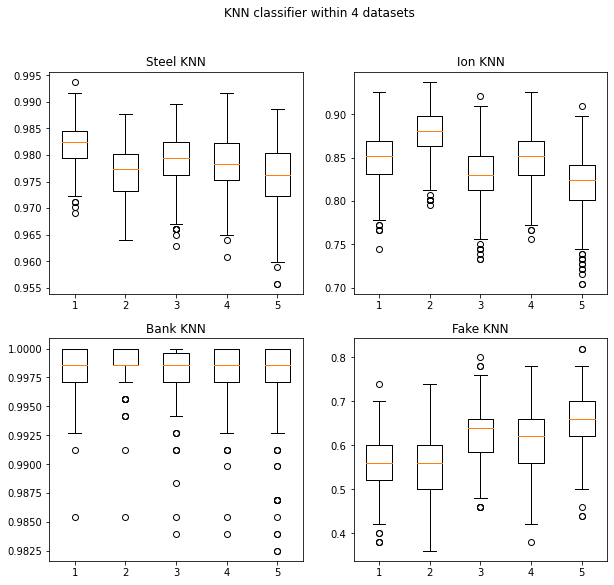

In [27]:
#figsize is the (width,length)
#subplot 2 rows, by 2 col.
fig, axs = plt.subplots(2,2,figsize=(10,9))
fig.suptitle('KNN classifier within 4 datasets')
axs[0, 0].boxplot(STEEL_KNN)
axs[0, 0].set_title('Steel KNN')
axs[0, 1].boxplot(ION_KNN)
axs[0, 1].set_title('Ion KNN')
axs[1, 0].boxplot(BANK_KNN)
axs[1, 0].set_title('Bank KNN')
axs[1, 1].boxplot(FAKE_KNN)
axs[1, 1].set_title('Fake KNN')

plt.show()

# 2nd classifier (Gaussian) on 4 datasets

In [28]:
#Second classifier Gaussian NB
from sklearn.naive_bayes import GaussianNB

#Empty list for boxplot
boxlist_GAUSS1 = []
boxlist_GAUSS2 = []
boxlist_GAUSS3 = []

count = 1
for ds in datasets: 

    #Iterate over range of 250 splits.
    for j in range(250): 
        
            
        # preprocess dataset, split into training and test part
        train_set,test_set = train_test_split(ds, train_size=0.5, test_size=0.5, random_state=j)
        

        #If count is one then we know its the steel dataset
        if count==1:
            #print("i'm on dataset {}!\n".format(count))
            
            #Same for train set(Target is Class)
            X_train = train_set.drop("Class", axis=1) # drop labels for training set
            y_train = train_set["Class"].copy()
    
            #same for test set
            X_test = test_set.drop("Class", axis=1)
            y_test = test_set["Class"].copy()
            
            #Preprocess after split
            X_train = StandardScaler().fit_transform(X_train) 
            X_test = StandardScaler().fit_transform(X_test) 
                
        #If count is one then we know its the ion 
        elif count==2:
            #print("i'm on dataset {}!\n".format(count))
            
            #Same for train set(Target is Class)
            X_train = train_set.drop("class", axis=1) # drop labels for training set
            y_train = train_set["class"].copy()

            #same for test set
            X_test = test_set.drop("class", axis=1)
            y_test = test_set["class"].copy()
            
            #Preprocess after split
            X_train = StandardScaler().fit_transform(X_train) 
            X_test = StandardScaler().fit_transform(X_test) 
            
            
        #If count is one then we know its the bank
        elif count==3:
            #print("i'm on dataset {}!\n".format(count))
            
            #Same for train set(Target is Class)
            X_train = train_set.drop("Class", axis=1) # drop labels for training set
            y_train = train_set["Class"].copy()

            #same for test set
            X_test = test_set.drop("Class", axis=1)
            y_test = test_set["Class"].copy()
            
            #Preprocess after split
            X_train = StandardScaler().fit_transform(X_train) 
            X_test = StandardScaler().fit_transform(X_test) 
               
            
            
        #If count is one then we know its the fake dataset
        elif count==4:
            #print("i'm on dataset {}!\n".format(count))
            
            #Same for train set(Target is Class)
            X_train = train_set.drop(20, axis=1) # drop labels for training set
            y_train = train_set[20].copy()

            #same for test set
            X_test = test_set.drop(20, axis=1)
            y_test = test_set[20].copy()
            
            #Preprocess after split
            X_train = StandardScaler().fit_transform(X_train) 
            X_test = StandardScaler().fit_transform(X_test) 
        
    
        gauss1 = GaussianNB(var_smoothing = 1e-9).fit(X_train,y_train)
        gaussscore1 = gauss1.score(X_test, y_test)
        boxlist_GAUSS1.append(gaussscore1)
        #print("Split No.{} appended {} to gauss1!".format(j, gaussscore1))
        
        gauss2 = GaussianNB(var_smoothing = 1e-5).fit(X_train,y_train)
        gaussscore2 = gauss2.score(X_test, y_test)
        boxlist_GAUSS2.append(gaussscore2)
        #print("Split No.{} appended {} to gauss2!".format(j, gaussscore2))
    
        gauss3 = GaussianNB(var_smoothing = 1e-1).fit(X_train,y_train)
        gaussscore3 = gauss3.score(X_test, y_test)
        boxlist_GAUSS3.append(gaussscore3)
        #print("Split No.{} appended {} to gauss3!".format(j, gaussscore3))
    
    count+=1
        
        

# Validation error Gaussian DB

In [29]:
steel_gauss1 = boxlist_GAUSS1[0:250]
steel_gauss2 = boxlist_GAUSS2[0:250]
steel_gauss3 = boxlist_GAUSS3[0:250]


ion_gauss1 = boxlist_GAUSS1[250:500]
ion_gauss2 = boxlist_GAUSS2[250:500]
ion_gauss3 = boxlist_GAUSS3[250:500]


bank_gauss1 = boxlist_GAUSS1[500:750]
bank_gauss2 = boxlist_GAUSS2[500:750]
bank_gauss3 = boxlist_GAUSS3[500:750]


fake_gauss1 = boxlist_GAUSS1[750:1000]
fake_gauss2 = boxlist_GAUSS2[750:1000]
fake_gauss3 = boxlist_GAUSS3[750:1000]

In [30]:
print(1-np.mean(steel_gauss1))
print(1-np.mean(steel_gauss2))
print(1-np.mean(steel_gauss3))

VAL_GAUSS_STEEL = min(1-np.mean(steel_gauss1),1-np.mean(steel_gauss2),1-np.mean(steel_gauss3))  
print(VAL_GAUSS_STEEL)

0.3466076210092688
0.3346199794026776
0.011439752832131722
0.011439752832131722


In [31]:
print(1-np.mean(ion_gauss1))
print(1-np.mean(ion_gauss2))
print(1-np.mean(ion_gauss3))

VAL_GAUSS_ION = min(1-np.mean(ion_gauss1),1-np.mean(ion_gauss2),1-np.mean(ion_gauss3))  
print(VAL_GAUSS_ION)

0.64375
0.5473863636363636
0.14409090909090905
0.14409090909090905


In [32]:
print(1-np.mean(bank_gauss1))
print(1-np.mean(bank_gauss2))
print(1-np.mean(bank_gauss3))

VAL_GAUSS_BANK = min(1-np.mean(bank_gauss1),1-np.mean(bank_gauss2),1-np.mean(bank_gauss3))  
print(VAL_GAUSS_BANK)

0.15841982507288632
0.15841982507288632
0.16047230320699712
0.15841982507288632


In [33]:
print(1-np.mean(fake_gauss1))
print(1-np.mean(fake_gauss2))
print(1-np.mean(fake_gauss3))

VAL_GAUSS_FAKE = min(1-np.mean(fake_gauss1),1-np.mean(fake_gauss2),1-np.mean(fake_gauss3))  
print(VAL_GAUSS_FAKE)

0.27832
0.27832
0.27888000000000013
0.27832


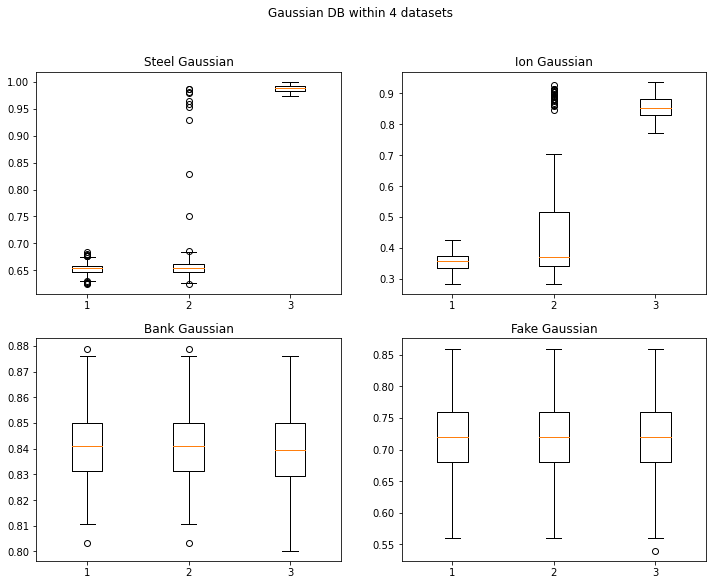

In [34]:
#Code for boxplots.
boxlist_GAUSS1 = pd.DataFrame(boxlist_GAUSS1)
boxlist_GAUSS2 = pd.DataFrame(boxlist_GAUSS2)
boxlist_GAUSS3 = pd.DataFrame(boxlist_GAUSS3)

steel_gauss1 = boxlist_GAUSS1[0:250]
steel_gauss2 = boxlist_GAUSS2[0:250]
steel_gauss3 = boxlist_GAUSS3[0:250]


ion_gauss1 = boxlist_GAUSS1[250:500]
ion_gauss2 = boxlist_GAUSS2[250:500]
ion_gauss3 = boxlist_GAUSS3[250:500]


bank_gauss1 = boxlist_GAUSS1[500:750]
bank_gauss2 = boxlist_GAUSS2[500:750]
bank_gauss3 = boxlist_GAUSS3[500:750]


fake_gauss1 = boxlist_GAUSS1[750:1000]
fake_gauss2 = boxlist_GAUSS2[750:1000]
fake_gauss3 = boxlist_GAUSS3[750:1000]


data1 = [steel_gauss1, steel_gauss2, steel_gauss3]
data2 = [ion_gauss1, ion_gauss2, ion_gauss3]
data3 = [bank_gauss1, bank_gauss2, bank_gauss3]
data4 = [fake_gauss1,fake_gauss2,fake_gauss3]

gauss_headers = ["1e-9", "1e-5", "1e-1"]

STEEL_GAUSS = pd.concat(data1, axis=1, keys=gauss_headers)
ION_GAUSS = pd.concat(data2, axis=1, keys=gauss_headers)
BANK_GAUSS = pd.concat(data3, axis=1, keys=gauss_headers)
FAKE_GAUSS = pd.concat(data4, axis=1, keys=gauss_headers)

#figsize is the (width,length)
#subplot 2 rows, by 2 col.
fig, axs = plt.subplots(2,2,figsize=(12,9))
fig.suptitle('Gaussian DB within 4 datasets')
axs[0, 0].boxplot(STEEL_GAUSS)
axs[0, 0].set_title('Steel Gaussian')
axs[0, 1].boxplot(ION_GAUSS)
axs[0, 1].set_title('Ion Gaussian')
axs[1, 0].boxplot(BANK_GAUSS)
axs[1, 0].set_title('Bank Gaussian')
axs[1, 1].boxplot(FAKE_GAUSS)
axs[1, 1].set_title('Fake Gaussian')

plt.show()

# 3rd classifier (Logistic Regression) on 4 datasets

In [35]:
#Second classifier Gaussian NB
from sklearn.linear_model import LogisticRegression

#Empty list for boxplot
boxlist_LOG1 = []
boxlist_LOG2 = []
boxlist_LOG3 = []
boxlist_LOG4 = []
boxlist_LOG5 = []

count = 1
for ds in datasets: 

    #Iterate over range of 250 splits.
    for j in range(250): 
        
            
        # preprocess dataset, split into training and test part
        train_set,test_set = train_test_split(ds, train_size=0.5, test_size=0.5, random_state=j)
        

        #If count is one then we know its the steel dataset
        if count==1:
            #print("i'm on dataset {}!\n".format(count))
            
            #Same for train set(Target is Class)
            X_train = train_set.drop("Class", axis=1) # drop labels for training set
            y_train = train_set["Class"].copy()
    
            #same for test set
            X_test = test_set.drop("Class", axis=1)
            y_test = test_set["Class"].copy()
            
            #Preprocess after split
            X_train = StandardScaler().fit_transform(X_train) 
            X_test = StandardScaler().fit_transform(X_test) 
                
        #If count is one then we know its the ion 
        elif count==2:
            #print("i'm on dataset {}!\n".format(count))
            
            #Same for train set(Target is Class)
            X_train = train_set.drop("class", axis=1) # drop labels for training set
            y_train = train_set["class"].copy()

            #same for test set
            X_test = test_set.drop("class", axis=1)
            y_test = test_set["class"].copy()
            
            #Preprocess after split
            X_train = StandardScaler().fit_transform(X_train) 
            X_test = StandardScaler().fit_transform(X_test) 
            
            
        #If count is one then we know its the bank
        elif count==3:
            #print("i'm on dataset {}!\n".format(count))
            
            #Same for train set(Target is Class)
            X_train = train_set.drop("Class", axis=1) # drop labels for training set
            y_train = train_set["Class"].copy()

            #same for test set
            X_test = test_set.drop("Class", axis=1)
            y_test = test_set["Class"].copy()
            
            #Preprocess after split
            X_train = StandardScaler().fit_transform(X_train) 
            X_test = StandardScaler().fit_transform(X_test) 
               
            
            
        #If count is one then we know its the fake dataset
        elif count==4:
            #print("i'm on dataset {}!\n".format(count))
            
            #Same for train set(Target is Class)
            X_train = train_set.drop(20, axis=1) # drop labels for training set
            y_train = train_set[20].copy()

            #same for test set
            X_test = test_set.drop(20, axis=1)
            y_test = test_set[20].copy()
            
            #Preprocess after split
            X_train = StandardScaler().fit_transform(X_train) 
            X_test = StandardScaler().fit_transform(X_test) 
        
    
        log1 = LogisticRegression(C = 0.1).fit(X_train,y_train)
        logscore1 = log1.score(X_test, y_test)
        boxlist_LOG1.append(logscore1)
        #print("Split No.{} appended {} to log1!".format(j, logscore1))
        
        log2 = LogisticRegression(C = 0.5).fit(X_train,y_train)
        logscore2 = log2.score(X_test, y_test)
        boxlist_LOG2.append(logscore2)
        #print("Split No.{} appended {} to log2!".format(j, logscore2))
        
        log3 = LogisticRegression(C = 1).fit(X_train,y_train)
        logscore3 = log3.score(X_test, y_test)
        boxlist_LOG3.append(logscore3)
        #print("Split No.{} appended {} to log3!".format(j, logscore3))
        
        log4 = LogisticRegression(C = 2).fit(X_train,y_train)
        logscore4 = log4.score(X_test, y_test)
        boxlist_LOG4.append(logscore4)
        #print("Split No.{} appended {} to log4!".format(j, logscore4))
        
        log5 = LogisticRegression(C = 5).fit(X_train,y_train)
        logscore5 = log5.score(X_test, y_test)
        boxlist_LOG5.append(logscore1)
        #print("Split No.{} appended {} to log5!".format(j, logscore5))

    
    count+=1
        
        

# Validation errors logistic regression

In [36]:
steel_log1 = boxlist_LOG1[0:250]
steel_log2 = boxlist_LOG2[0:250]
steel_log3 = boxlist_LOG3[0:250]
steel_log4 = boxlist_LOG4[0:250]
steel_log5 = boxlist_LOG5[0:250]

ion_log1 = boxlist_LOG1[250:500]
ion_log2 = boxlist_LOG2[250:500]
ion_log3 = boxlist_LOG3[250:500]
ion_log4 = boxlist_LOG4[250:500]
ion_log5 = boxlist_LOG5[250:500]

bank_log1 = boxlist_LOG1[500:750]
bank_log2 = boxlist_LOG2[500:750]
bank_log3 = boxlist_LOG3[500:750]
bank_log4 = boxlist_LOG4[500:750]
bank_log5 = boxlist_LOG5[500:750]

fake_log1 = boxlist_LOG1[750:1000]
fake_log2 = boxlist_LOG2[750:1000]
fake_log3 = boxlist_LOG3[750:1000]
fake_log4 = boxlist_LOG4[750:1000]
fake_log5 = boxlist_LOG5[750:1000]

In [37]:
print(1-np.mean(steel_log1))
print(1-np.mean(steel_log2))
print(1-np.mean(steel_log3))
print(1-np.mean(steel_log4))
print(1-np.mean(steel_log5))

VAL_LOG_STEEL = min(1-np.mean(steel_log1),1-np.mean(steel_log2),1-np.mean(steel_log3),1-np.mean(steel_log4),1-np.mean(steel_log5))  
print(VAL_LOG_STEEL)

0.0010175077239957808
0.000605561277033817
0.0005066941297632299
0.0004654994850669114
0.0010175077239957808
0.0004654994850669114


In [38]:
print(1-np.mean(ion_log1))
print(1-np.mean(ion_log2))
print(1-np.mean(ion_log3))
print(1-np.mean(ion_log4))
print(1-np.mean(ion_log5))

VAL_LOG_ION = min(1-np.mean(ion_log1),1-np.mean(ion_log2),1-np.mean(ion_log3),1-np.mean(ion_log4),1-np.mean(ion_log5))  
print(VAL_LOG_ION)

0.13043181818181815
0.13295454545454555
0.13475000000000004
0.13736363636363635
0.13043181818181815
0.13043181818181815


In [39]:
print(1-np.mean(bank_log1))
print(1-np.mean(bank_log2))
print(1-np.mean(bank_log3))
print(1-np.mean(bank_log4))
print(1-np.mean(bank_log5))

VAL_LOG_BANK = min(1-np.mean(bank_log1),1-np.mean(bank_log2),1-np.mean(bank_log3),1-np.mean(bank_log4),1-np.mean(bank_log5))  
print(VAL_LOG_BANK)

0.02779591836734685
0.02085131195335277
0.0189795918367347
0.01755685131195328
0.02779591836734685
0.01755685131195328


In [40]:
print(1-np.mean(fake_log1))
print(1-np.mean(fake_log2))
print(1-np.mean(fake_log3))
print(1-np.mean(fake_log4))
print(1-np.mean(fake_log5))

VAL_LOG_FAKE = min(1-np.mean(fake_log1),1-np.mean(fake_log2),1-np.mean(fake_log3),1-np.mean(fake_log4),1-np.mean(fake_log5))  
print(VAL_LOG_FAKE)

0.30024000000000006
0.29288000000000003
0.29455999999999993
0.2976000000000001
0.30024000000000006
0.29288000000000003


In [41]:
#Code for boxplots.
boxlist_LOG1 = pd.DataFrame(boxlist_LOG1)
boxlist_LOG2 = pd.DataFrame(boxlist_LOG2)
boxlist_LOG3 = pd.DataFrame(boxlist_LOG3)
boxlist_LOG4 = pd.DataFrame(boxlist_LOG4)
boxlist_LOG5 = pd.DataFrame(boxlist_LOG5)

steel_log1 = boxlist_LOG1[0:250]
steel_log2 = boxlist_LOG2[0:250]
steel_log3 = boxlist_LOG3[0:250]
steel_log4 = boxlist_LOG4[0:250]
steel_log5 = boxlist_LOG5[0:250]

ion_log1 = boxlist_LOG1[250:500]
ion_log2 = boxlist_LOG2[250:500]
ion_log3 = boxlist_LOG3[250:500]
ion_log4 = boxlist_LOG4[250:500]
ion_log5 = boxlist_LOG5[250:500]

bank_log1 = boxlist_LOG1[500:750]
bank_log2 = boxlist_LOG2[500:750]
bank_log3 = boxlist_LOG3[500:750]
bank_log4 = boxlist_LOG4[500:750]
bank_log5 = boxlist_LOG5[500:750]

fake_log1 = boxlist_LOG1[750:1000]
fake_log2 = boxlist_LOG2[750:1000]
fake_log3 = boxlist_LOG3[750:1000]
fake_log4 = boxlist_LOG4[750:1000]
fake_log5 = boxlist_LOG5[750:1000]


data1 = [steel_log1, steel_log2, steel_log3, steel_log4, steel_log5]
data2 = [ion_log1, ion_log2, ion_log3,ion_log4,ion_log5]
data3 = [bank_log1, bank_log2, bank_log3, bank_log4, bank_log5]
data4 = [fake_log1,fake_log2,fake_log3,fake_log4,fake_log5]

log_headers = ["0.1", "0.5", "1", "2", "5"]

STEEL_LOG = pd.concat(data1, axis=1, keys=log_headers)
ION_LOG = pd.concat(data2, axis=1, keys=log_headers)
BANK_LOG = pd.concat(data3, axis=1, keys=log_headers)
FAKE_LOG = pd.concat(data4, axis=1, keys=log_headers)

# boxplot logistic regression

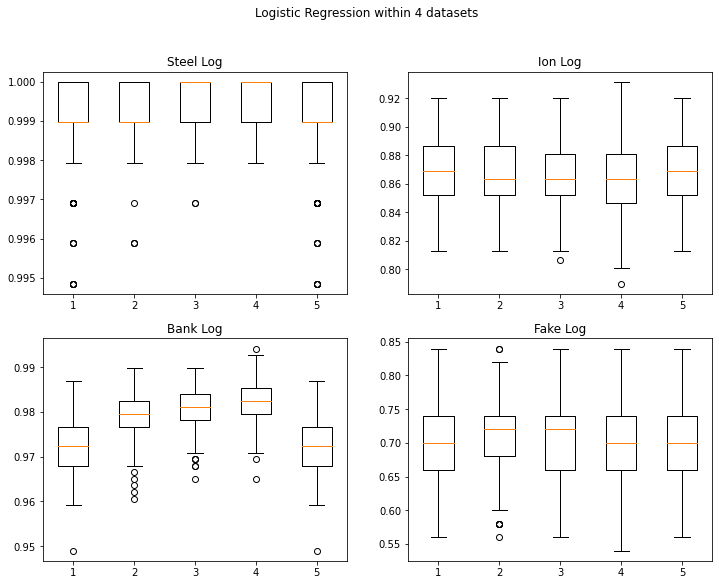

In [42]:
#figsize is the (width,length)
#subplot 2 rows, by 2 col.
fig, axs = plt.subplots(2,2,figsize=(12,9))
fig.suptitle('Logistic Regression within 4 datasets')
axs[0, 0].boxplot(STEEL_LOG)
axs[0, 0].set_title('Steel Log')
axs[0, 1].boxplot(ION_LOG)
axs[0, 1].set_title('Ion Log')
axs[1, 0].boxplot(BANK_LOG)
axs[1, 0].set_title('Bank Log')
axs[1, 1].boxplot(FAKE_LOG)
axs[1, 1].set_title('Fake Log')

plt.show()

# 4th classifier (DecisionTreeClassifier) on 4 datasets

In [43]:
#Decision classifier
from sklearn.tree import DecisionTreeClassifier

boxlist_DT1_STEEL = []
boxlist_DT2_STEEL = []
boxlist_DT3_STEEL = []
boxlist_DT4_STEEL = []
boxlist_DT5_STEEL = []
boxlist_DT6_STEEL = []
boxlist_DT7_STEEL = []
boxlist_DT8_STEEL = []
boxlist_DT9_STEEL = []
boxlist_DT10_STEEL = []

boxlist_DT1_ION = []
boxlist_DT2_ION = []
boxlist_DT3_ION = []
boxlist_DT4_ION = []
boxlist_DT5_ION = []
boxlist_DT6_ION = []
boxlist_DT7_ION = []
boxlist_DT8_ION = []
boxlist_DT9_ION = []
boxlist_DT10_ION = []

boxlist_DT1_BANK = []
boxlist_DT2_BANK = []
boxlist_DT3_BANK = []
boxlist_DT4_BANK = []
boxlist_DT5_BANK = []
boxlist_DT6_BANK = []
boxlist_DT7_BANK = []
boxlist_DT8_BANK = []
boxlist_DT9_BANK = []
boxlist_DT10_BANK = []

boxlist_DT1_FAKE = []
boxlist_DT2_FAKE = []
boxlist_DT3_FAKE = []
boxlist_DT4_FAKE = []
boxlist_DT5_FAKE = []
boxlist_DT6_FAKE = []
boxlist_DT7_FAKE = []
boxlist_DT8_FAKE = []
boxlist_DT9_FAKE = []
boxlist_DT10_FAKE = []

#Iterate over range of 250 splits.
for i in range(250): 
    train_set,test_set = train_test_split(steel, train_size=0.5, test_size=0.5, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop("Class", axis=1) # drop labels for training set
    y_train = train_set["Class"].copy()
    
    #same for test set
    X_test = test_set.drop("Class", axis=1)
    y_test = test_set["Class"].copy()
            
    #Preprocess after split
    X_train = StandardScaler().fit_transform(X_train) 
    X_test = StandardScaler().fit_transform(X_test) 
                
    #print("Split No.{}".format(i))
    for depth in range(1,11):
        dt = DecisionTreeClassifier(max_depth = depth).fit(X_train,y_train)
        dtscore = dt.score(X_test, y_test)
        if depth == 1:
            boxlist_DT1_STEEL.append(dtscore)
            #print("I've appended score {} at depth {}! to dt1".format(dtscore, depth))
            
        elif depth == 2:
            boxlist_DT2_STEEL.append(dtscore)
            #print("I've appended score {} at depth {}! to dt2".format(dtscore, depth))
            
        elif depth == 3:
            boxlist_DT3_STEEL.append(dtscore)
            #print("I've appended score {} at depth {}! to dt3".format(dtscore, depth))
            
        elif depth == 4:
            boxlist_DT4_STEEL.append(dtscore)
            #print("I've appended score {} at depth {}! to dt4".format(dtscore, depth))
            
        elif depth == 5:
            boxlist_DT5_STEEL.append(dtscore)
            #print("I've appended score {} at depth {}! to dt5".format(dtscore, depth))
            
        elif depth == 6:
            boxlist_DT6_STEEL.append(dtscore)
            #print("I've appended score {} at depth {}! to dt6".format(dtscore, depth))
            
        elif depth == 7:
            boxlist_DT7_STEEL.append(dtscore)
            #print("I've appended score {} at depth {}! to dt7".format(dtscore, depth))
            
        elif depth == 8:
            boxlist_DT8_STEEL.append(dtscore)
            #print("I've appended score {} at depth {}! to dt8".format(dtscore, depth))
            
        elif depth == 9:
            boxlist_DT9_STEEL.append(dtscore)
            #print("I've appended score {} at depth {}! to dt9".format(dtscore, depth))
            
        elif depth == 10:
            boxlist_DT10_STEEL.append(dtscore)
            #print("I've appended score {} at depth {}! to dt10".format(dtscore, depth))
            
#Iterate over range of 250 splits.
for i in range(250): 
    train_set,test_set = train_test_split(ion, train_size=0.5, test_size=0.5, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop("class", axis=1) # drop labels for training set
    y_train = train_set["class"].copy()
    
    #same for test set
    X_test = test_set.drop("class", axis=1)
    y_test = test_set["class"].copy()
            
    #Preprocess after split
    X_train = StandardScaler().fit_transform(X_train) 
    X_test = StandardScaler().fit_transform(X_test) 
    
    #print("Split No.{}".format(i))
    for depth in range(1,11):
        dt = DecisionTreeClassifier(max_depth = depth).fit(X_train,y_train)
        dtscore = dt.score(X_test, y_test)
        if depth == 1:
            boxlist_DT1_ION.append(dtscore)
            #print("I've appended score {} at depth {}! to dt1".format(dtscore, depth))
            
        elif depth == 2:
            boxlist_DT2_ION.append(dtscore)
            #print("I've appended score {} at depth {}! to dt2".format(dtscore, depth))
            
        elif depth == 3:
            boxlist_DT3_ION.append(dtscore)
            #print("I've appended score {} at depth {}! to dt3".format(dtscore, depth))
            
        elif depth == 4:
            boxlist_DT4_ION.append(dtscore)
            #print("I've appended score {} at depth {}! to dt4".format(dtscore, depth))
            
        elif depth == 5:
            boxlist_DT5_ION.append(dtscore)
            #print("I've appended score {} at depth {}! to dt5".format(dtscore, depth))
            
        elif depth == 6:
            boxlist_DT6_ION.append(dtscore)
            #print("I've appended score {} at depth {}! to dt6".format(dtscore, depth))
            
        elif depth == 7:
            boxlist_DT7_ION.append(dtscore)
            #print("I've appended score {} at depth {}! to dt7".format(dtscore, depth))
            
        elif depth == 8:
            boxlist_DT8_ION.append(dtscore)
            #print("I've appended score {} at depth {}! to dt8".format(dtscore, depth))
            
        elif depth == 9:
            boxlist_DT9_ION.append(dtscore)
            #print("I've appended score {} at depth {}! to dt9".format(dtscore, depth))
            
        elif depth == 10:
            boxlist_DT10_ION.append(dtscore)
            #print("I've appended score {} at depth {}! to dt10".format(dtscore, depth))
            
#Iterate over range of 250 splits.
for i in range(250): 
    train_set,test_set = train_test_split(bank, train_size=0.5, test_size=0.5, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop("Class", axis=1) # drop labels for training set
    y_train = train_set["Class"].copy()
    
    #same for test set
    X_test = test_set.drop("Class", axis=1)
    y_test = test_set["Class"].copy()
            
    #Preprocess after split
    X_train = StandardScaler().fit_transform(X_train) 
    X_test = StandardScaler().fit_transform(X_test) 
    
    #print("Split No.{}".format(i))
    for depth in range(1,11):
        dt = DecisionTreeClassifier(max_depth = depth).fit(X_train,y_train)
        dtscore = dt.score(X_test, y_test)
        if depth == 1:
            boxlist_DT1_BANK.append(dtscore)
            #print("I've appended score {} at depth {}! to dt1".format(dtscore, depth))
            
        elif depth == 2:
            boxlist_DT2_BANK.append(dtscore)
            #print("I've appended score {} at depth {}! to dt2".format(dtscore, depth))
            
        elif depth == 3:
            boxlist_DT3_BANK.append(dtscore)
            #print("I've appended score {} at depth {}! to dt3".format(dtscore, depth))
            
        elif depth == 4:
            boxlist_DT4_BANK.append(dtscore)
            #print("I've appended score {} at depth {}! to dt4".format(dtscore, depth))
            
        elif depth == 5:
            boxlist_DT5_BANK.append(dtscore)
            #print("I've appended score {} at depth {}! to dt5".format(dtscore, depth))
            
        elif depth == 6:
            boxlist_DT6_BANK.append(dtscore)
            #print("I've appended score {} at depth {}! to dt6".format(dtscore, depth))
            
        elif depth == 7:
            boxlist_DT7_BANK.append(dtscore)
            #print("I've appended score {} at depth {}! to dt7".format(dtscore, depth))
            
        elif depth == 8:
            boxlist_DT8_BANK.append(dtscore)
            #print("I've appended score {} at depth {}! to dt8".format(dtscore, depth))
            
        elif depth == 9:
            boxlist_DT9_BANK.append(dtscore)
            #print("I've appended score {} at depth {}! to dt9".format(dtscore, depth))
            
        elif depth == 10:
            boxlist_DT10_BANK.append(dtscore)
            #print("I've appended score {} at depth {}! to dt10".format(dtscore, depth))
        
#Iterate over range of 250 splits.
for i in range(250): 
    train_set,test_set = train_test_split(fake, train_size=0.5, test_size=0.5, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop(20, axis=1) # drop labels for training set
    y_train = train_set[20].copy()

    #same for test set
    X_test = test_set.drop(20, axis=1)
    y_test = test_set[20].copy()
            
    #Preprocess after split
    X_train = StandardScaler().fit_transform(X_train) 
    X_test = StandardScaler().fit_transform(X_test) 
    
    
    #print("Split No.{}".format(i))
    for depth in range(1,11):
        dt = DecisionTreeClassifier(max_depth = depth).fit(X_train,y_train)
        dtscore = dt.score(X_test, y_test)
        if depth == 1:
            boxlist_DT1_FAKE.append(dtscore)
            #print("I've appended score {} at depth {}! to dt1".format(dtscore, depth))
            
        elif depth == 2:
            boxlist_DT2_FAKE.append(dtscore)
            #print("I've appended score {} at depth {}! to dt2".format(dtscore, depth))
            
        elif depth == 3:
            boxlist_DT3_FAKE.append(dtscore)
            #print("I've appended score {} at depth {}! to dt3".format(dtscore, depth))
            
        elif depth == 4:
            boxlist_DT4_FAKE.append(dtscore)
            #print("I've appended score {} at depth {}! to dt4".format(dtscore, depth))
            
        elif depth == 5:
            boxlist_DT5_FAKE.append(dtscore)
            #print("I've appended score {} at depth {}! to dt5".format(dtscore, depth))
            
        elif depth == 6:
            boxlist_DT6_FAKE.append(dtscore)
            #print("I've appended score {} at depth {}! to dt6".format(dtscore, depth))
            
        elif depth == 7:
            boxlist_DT7_FAKE.append(dtscore)
            #print("I've appended score {} at depth {}! to dt7".format(dtscore, depth))
            
        elif depth == 8:
            boxlist_DT8_FAKE.append(dtscore)
            #print("I've appended score {} at depth {}! to dt8".format(dtscore, depth))
            
        elif depth == 9:
            boxlist_DT9_FAKE.append(dtscore)
            #print("I've appended score {} at depth {}! to dt9".format(dtscore, depth))
            
        elif depth == 10:
            boxlist_DT10_FAKE.append(dtscore)
            #print("I've appended score {} at depth {}! to dt10".format(dtscore, depth))
              


# Validation error Decision Tree Classifier

In [44]:
print(1-np.mean(boxlist_DT1_STEEL))
print(1-np.mean(boxlist_DT2_STEEL))
print(1-np.mean(boxlist_DT3_STEEL))
print(1-np.mean(boxlist_DT4_STEEL))
print(1-np.mean(boxlist_DT5_STEEL))
print(1-np.mean(boxlist_DT6_STEEL))
print(1-np.mean(boxlist_DT7_STEEL))
print(1-np.mean(boxlist_DT8_STEEL))
print(1-np.mean(boxlist_DT9_STEEL))
print(1-np.mean(boxlist_DT10_STEEL))

VAL_DT_STEEL = min(1-np.mean(boxlist_DT1_STEEL),
                    1-np.mean(boxlist_DT2_STEEL),
                    1-np.mean(boxlist_DT3_STEEL),
                    1-np.mean(boxlist_DT4_STEEL),
                    1-np.mean(boxlist_DT5_STEEL),
                    1-np.mean(boxlist_DT6_STEEL),
                    1-np.mean(boxlist_DT7_STEEL),
                    1-np.mean(boxlist_DT8_STEEL),
                    1-np.mean(boxlist_DT9_STEEL),
                    1-np.mean(boxlist_DT10_STEEL))  
print(VAL_DT_STEEL)

0.3466076210092688
0.2444160659114316
0.14831307929969118
0.06542533470648826
0.029857878475798127
0.0
0.0
0.0
0.0
0.0
0.0


In [45]:
print(1-np.mean(boxlist_DT1_ION))
print(1-np.mean(boxlist_DT2_ION))
print(1-np.mean(boxlist_DT3_ION))
print(1-np.mean(boxlist_DT4_ION))
print(1-np.mean(boxlist_DT5_ION))
print(1-np.mean(boxlist_DT6_ION))
print(1-np.mean(boxlist_DT7_ION))
print(1-np.mean(boxlist_DT8_ION))
print(1-np.mean(boxlist_DT9_ION))
print(1-np.mean(boxlist_DT10_ION))

VAL_DT_ION = min(1-np.mean(boxlist_DT1_ION),
                    1-np.mean(boxlist_DT2_ION),
                    1-np.mean(boxlist_DT3_ION),
                    1-np.mean(boxlist_DT4_ION),
                    1-np.mean(boxlist_DT5_ION),
                    1-np.mean(boxlist_DT6_ION),
                    1-np.mean(boxlist_DT7_ION),
                    1-np.mean(boxlist_DT8_ION),
                    1-np.mean(boxlist_DT9_ION),
                    1-np.mean(boxlist_DT10_ION))  
print(VAL_DT_ION)

0.20811363636363622
0.16679545454545452
0.15736363636363648
0.14675000000000005
0.14097727272727278
0.13877272727272727
0.13911363636363627
0.14020454545454553
0.14225
0.14186363636363641
0.13877272727272727


In [46]:
print(1-np.mean(boxlist_DT1_BANK))
print(1-np.mean(boxlist_DT2_BANK))
print(1-np.mean(boxlist_DT3_BANK))
print(1-np.mean(boxlist_DT4_BANK))
print(1-np.mean(boxlist_DT5_BANK))
print(1-np.mean(boxlist_DT6_BANK))
print(1-np.mean(boxlist_DT7_BANK))
print(1-np.mean(boxlist_DT8_BANK))
print(1-np.mean(boxlist_DT9_BANK))
print(1-np.mean(boxlist_DT10_BANK))

VAL_DT_BANK = min(1-np.mean(boxlist_DT1_BANK),
                    1-np.mean(boxlist_DT2_BANK),
                    1-np.mean(boxlist_DT3_BANK),
                    1-np.mean(boxlist_DT4_BANK),
                    1-np.mean(boxlist_DT5_BANK),
                    1-np.mean(boxlist_DT6_BANK),
                    1-np.mean(boxlist_DT7_BANK),
                    1-np.mean(boxlist_DT8_BANK),
                    1-np.mean(boxlist_DT9_BANK),
                    1-np.mean(boxlist_DT10_BANK))  
print(VAL_DT_BANK)

0.15815743440233243
0.10659475218658898
0.07594169096209913
0.05299708454810492
0.03420991253644323
0.028827988338192445
0.02726530612244893
0.02726530612244893
0.027323615160349868
0.027434402332361496
0.02726530612244893


In [47]:
print(1-np.mean(boxlist_DT1_FAKE))
print(1-np.mean(boxlist_DT2_FAKE))
print(1-np.mean(boxlist_DT3_FAKE))
print(1-np.mean(boxlist_DT4_FAKE))
print(1-np.mean(boxlist_DT5_STEEL))
print(1-np.mean(boxlist_DT6_STEEL))
print(1-np.mean(boxlist_DT7_STEEL))
print(1-np.mean(boxlist_DT8_STEEL))
print(1-np.mean(boxlist_DT9_STEEL))
print(1-np.mean(boxlist_DT10_STEEL))

VAL_DT_FAKE = min(1-np.mean(boxlist_DT1_FAKE),
                    1-np.mean(boxlist_DT2_FAKE),
                    1-np.mean(boxlist_DT3_FAKE),
                    1-np.mean(boxlist_DT4_FAKE),
                    1-np.mean(boxlist_DT5_FAKE),
                    1-np.mean(boxlist_DT6_FAKE),
                    1-np.mean(boxlist_DT7_FAKE),
                    1-np.mean(boxlist_DT8_FAKE),
                    1-np.mean(boxlist_DT9_FAKE),
                    1-np.mean(boxlist_DT10_FAKE))  
print(VAL_DT_FAKE)

0.33728
0.3275999999999999
0.32896000000000003
0.3321600000000001
0.029857878475798127
0.0
0.0
0.0
0.0
0.0
0.3275999999999999


In [48]:
#Code for boxplots.
boxlist_DT1_STEEL = pd.DataFrame(boxlist_DT1_STEEL)
boxlist_DT2_STEEL = pd.DataFrame(boxlist_DT2_STEEL)
boxlist_DT3_STEEL = pd.DataFrame(boxlist_DT3_STEEL)
boxlist_DT4_STEEL = pd.DataFrame(boxlist_DT4_STEEL)
boxlist_DT5_STEEL = pd.DataFrame(boxlist_DT5_STEEL)
boxlist_DT6_STEEL = pd.DataFrame(boxlist_DT6_STEEL)
boxlist_DT7_STEEL = pd.DataFrame(boxlist_DT7_STEEL)
boxlist_DT8_STEEL = pd.DataFrame(boxlist_DT8_STEEL)
boxlist_DT9_STEEL = pd.DataFrame(boxlist_DT9_STEEL)
boxlist_DT10_STEEL = pd.DataFrame(boxlist_DT10_STEEL)

boxlist_DT1_ION = pd.DataFrame(boxlist_DT1_ION)
boxlist_DT2_ION = pd.DataFrame(boxlist_DT2_ION)
boxlist_DT3_ION = pd.DataFrame(boxlist_DT3_ION)
boxlist_DT4_ION = pd.DataFrame(boxlist_DT4_ION)
boxlist_DT5_ION = pd.DataFrame(boxlist_DT5_ION)
boxlist_DT6_ION = pd.DataFrame(boxlist_DT6_ION)
boxlist_DT7_ION = pd.DataFrame(boxlist_DT7_ION)
boxlist_DT8_ION = pd.DataFrame(boxlist_DT8_ION)
boxlist_DT9_ION = pd.DataFrame(boxlist_DT9_ION)
boxlist_DT10_ION = pd.DataFrame(boxlist_DT10_ION)

boxlist_DT1_BANK = pd.DataFrame(boxlist_DT1_BANK)
boxlist_DT2_BANK = pd.DataFrame(boxlist_DT2_BANK)
boxlist_DT3_BANK = pd.DataFrame(boxlist_DT3_BANK)
boxlist_DT4_BANK = pd.DataFrame(boxlist_DT4_BANK)
boxlist_DT5_BANK = pd.DataFrame(boxlist_DT5_BANK)
boxlist_DT6_BANK = pd.DataFrame(boxlist_DT6_BANK)
boxlist_DT7_BANK = pd.DataFrame(boxlist_DT7_BANK)
boxlist_DT8_BANK = pd.DataFrame(boxlist_DT8_BANK)
boxlist_DT9_BANK = pd.DataFrame(boxlist_DT9_BANK)
boxlist_DT10_BANK = pd.DataFrame(boxlist_DT10_BANK)

boxlist_DT1_FAKE = pd.DataFrame(boxlist_DT1_FAKE)
boxlist_DT2_FAKE = pd.DataFrame(boxlist_DT2_FAKE)
boxlist_DT3_FAKE = pd.DataFrame(boxlist_DT3_FAKE)
boxlist_DT4_FAKE = pd.DataFrame(boxlist_DT4_FAKE)
boxlist_DT5_FAKE = pd.DataFrame(boxlist_DT5_FAKE)
boxlist_DT6_FAKE = pd.DataFrame(boxlist_DT6_FAKE)
boxlist_DT7_FAKE = pd.DataFrame(boxlist_DT7_FAKE)
boxlist_DT8_FAKE = pd.DataFrame(boxlist_DT8_FAKE)
boxlist_DT9_FAKE = pd.DataFrame(boxlist_DT9_FAKE)
boxlist_DT10_FAKE = pd.DataFrame(boxlist_DT10_FAKE)



data1 = [boxlist_DT1_STEEL,
         boxlist_DT2_STEEL,
         boxlist_DT3_STEEL,
         boxlist_DT4_STEEL,
         boxlist_DT5_STEEL,
         boxlist_DT6_STEEL,
         boxlist_DT7_STEEL,
         boxlist_DT8_STEEL,
         boxlist_DT9_STEEL,
         boxlist_DT10_STEEL]


data2 =[boxlist_DT1_ION,
       boxlist_DT2_ION,
       boxlist_DT3_ION,
       boxlist_DT4_ION,
       boxlist_DT5_ION,
       boxlist_DT6_ION,
       boxlist_DT7_ION,
       boxlist_DT8_ION,
       boxlist_DT9_ION,
       boxlist_DT10_ION,]

data3 =[boxlist_DT1_BANK,
       boxlist_DT2_BANK,
       boxlist_DT3_BANK,
       boxlist_DT4_BANK,
       boxlist_DT5_BANK,
       boxlist_DT6_BANK,
       boxlist_DT7_BANK,
       boxlist_DT8_BANK,
       boxlist_DT9_BANK,
       boxlist_DT10_BANK,]

data4 =[boxlist_DT1_FAKE,
       boxlist_DT2_FAKE,
       boxlist_DT3_FAKE,
       boxlist_DT4_FAKE,
       boxlist_DT5_FAKE,
       boxlist_DT6_FAKE,
       boxlist_DT7_FAKE,
       boxlist_DT8_FAKE,
       boxlist_DT9_FAKE,
       boxlist_DT10_FAKE]

dt_headers = ["1","2","3","4","5","6","7","8","9","10"]

STEEL_DT = pd.concat(data1, axis=1, keys=dt_headers)
ION_DT = pd.concat(data2, axis=1, keys=dt_headers)
BANK_DT = pd.concat(data3, axis=1, keys=dt_headers)
FAKE_DT = pd.concat(data4, axis=1, keys=dt_headers)

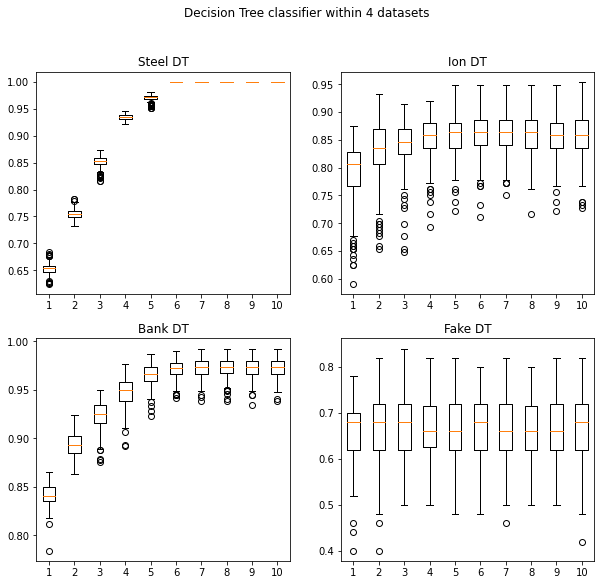

In [49]:
#figsize is the (width,length)
#subplot 2 rows, by 2 col.
fig, axs = plt.subplots(2,2,figsize=(10,9))
fig.suptitle('Decision Tree classifier within 4 datasets')
axs[0, 0].boxplot(STEEL_DT)
axs[0, 0].set_title('Steel DT')
axs[0, 1].boxplot(ION_DT)
axs[0, 1].set_title('Ion DT')
axs[1, 0].boxplot(BANK_DT)
axs[1, 0].set_title('Bank DT')
axs[1, 1].boxplot(FAKE_DT)
axs[1, 1].set_title('Fake DT')

plt.show()

## 5th classifier (GradientBoostingClassifier) on 4 datasets

In [50]:
#Decision classifier
from sklearn.ensemble import GradientBoostingClassifier

boxlist_GB1_STEEL = []
boxlist_GB2_STEEL = []
boxlist_GB3_STEEL = []
boxlist_GB4_STEEL = []
boxlist_GB5_STEEL = []
boxlist_GB6_STEEL = []
boxlist_GB7_STEEL = []
boxlist_GB8_STEEL = []
boxlist_GB9_STEEL = []
boxlist_GB10_STEEL = []

boxlist_GB1_ION = []
boxlist_GB2_ION = []
boxlist_GB3_ION = []
boxlist_GB4_ION = []
boxlist_GB5_ION = []
boxlist_GB6_ION = []
boxlist_GB7_ION = []
boxlist_GB8_ION = []
boxlist_GB9_ION = []
boxlist_GB10_ION = []

boxlist_GB1_BANK = []
boxlist_GB2_BANK = []
boxlist_GB3_BANK = []
boxlist_GB4_BANK = []
boxlist_GB5_BANK = []
boxlist_GB6_BANK = []
boxlist_GB7_BANK = []
boxlist_GB8_BANK = []
boxlist_GB9_BANK = []
boxlist_GB10_BANK = []

boxlist_GB1_FAKE = []
boxlist_GB2_FAKE = []
boxlist_GB3_FAKE = []
boxlist_GB4_FAKE = []
boxlist_GB5_FAKE = []
boxlist_GB6_FAKE = []
boxlist_GB7_FAKE = []
boxlist_GB8_FAKE = []
boxlist_GB9_FAKE = []
boxlist_GB10_FAKE = []

#Iterate over range of 250 splits.
for i in range(250): 
    train_set,test_set = train_test_split(steel, train_size=0.5, test_size=0.5, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop("Class", axis=1) # drop labels for training set
    y_train = train_set["Class"].copy()
    
    #same for test set
    X_test = test_set.drop("Class", axis=1)
    y_test = test_set["Class"].copy()
            
    #Preprocess after split
    X_train = StandardScaler().fit_transform(X_train) 
    X_test = StandardScaler().fit_transform(X_test) 
    #print("Split No.{}".format(i))
    for depth in range(1,11):
        gb = GradientBoostingClassifier(max_depth = depth).fit(X_train,y_train)
        gbscore = gb.score(X_test, y_test)
        if depth == 1:
            boxlist_GB1_STEEL.append(gbscore)
            #print("I've appended score {} at depth {}! to gb1".format(gbscore, depth))
            
        elif depth == 2:
            boxlist_GB2_STEEL.append(gbscore)
            #print("I've appended score {} at depth {}! to gb2".format(gbscore, depth))
            
        elif depth == 3:
            boxlist_GB3_STEEL.append(gbscore)
            #print("I've appended score {} at depth {}! to gb3".format(gbscore, depth))
            
        elif depth == 4:
            boxlist_GB4_STEEL.append(gbscore)
            #print("I've appended score {} at depth {}! to gb4".format(gbscore, depth))
            
        elif depth == 5:
            boxlist_GB5_STEEL.append(gbscore)
            #print("I've appended score {} at depth {}! to gb5".format(gbscore, depth))
            
        elif depth == 6:
            boxlist_GB6_STEEL.append(gbscore)
            #print("I've appended score {} at depth {}! to gb6".format(gbscore, depth))
            
        elif depth == 7:
            boxlist_GB7_STEEL.append(gbscore)
            #print("I've appended score {} at depth {}! to gb7".format(gbscore, depth))
            
        elif depth == 8:
            boxlist_GB8_STEEL.append(gbscore)
            #print("I've appended score {} at depth {}! to gb8".format(gbscore, depth))
            
        elif depth == 9:
            boxlist_GB9_STEEL.append(gbscore)
            #print("I've appended score {} at depth {}! to gb9".format(gbscore, depth))
            
        elif depth == 10:
            boxlist_GB10_STEEL.append(gbscore)
            #print("I've appended score {} at depth {}! to gb10".format(gbscore, depth))
            
#Iterate over range of 250 splits.
for i in range(250): 
    train_set,test_set = train_test_split(ion, train_size=0.5, test_size=0.5, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop("class", axis=1) # drop labels for training set
    y_train = train_set["class"].copy()
    
    #same for test set
    X_test = test_set.drop("class", axis=1)
    y_test = test_set["class"].copy()
            
    #Preprocess after split
    X_train = StandardScaler().fit_transform(X_train) 
    X_test = StandardScaler().fit_transform(X_test) 
    #print("Split No.{}".format(i))
    for depth in range(1,11):
        gb = GradientBoostingClassifier(max_depth = depth).fit(X_train,y_train)
        gbscore = gb.score(X_test, y_test)
        if depth == 1:
            boxlist_GB1_ION.append(gbscore)
            #print("I've appended score {} at depth {}! to gb1".format(gbscore, depth))
            
        elif depth == 2:
            boxlist_GB2_ION.append(gbscore)
            #print("I've appended score {} at depth {}! to gb2".format(gbscore, depth))
            
        elif depth == 3:
            boxlist_GB3_ION.append(gbscore)
            #print("I've appended score {} at depth {}! to gb3".format(gbscore, depth))
            
        elif depth == 4:
            boxlist_GB4_ION.append(gbscore)
            #print("I've appended score {} at depth {}! to gb4".format(gbscore, depth))
            
        elif depth == 5:
            boxlist_GB5_ION.append(gbscore)
            #print("I've appended score {} at depth {}! to gb5".format(gbscore, depth))
            
        elif depth == 6:
            boxlist_GB6_ION.append(gbscore)
            #print("I've appended score {} at depth {}! to gb6".format(gbscore, depth))
            
        elif depth == 7:
            boxlist_GB7_ION.append(gbscore)
            #print("I've appended score {} at depth {}! to gb7".format(gbscore, depth))
            
        elif depth == 8:
            boxlist_GB8_ION.append(gbscore)
            #print("I've appended score {} at depth {}! to gb8".format(gbscore, depth))
            
        elif depth == 9:
            boxlist_GB9_ION.append(gbscore)
            #print("I've appended score {} at depth {}! to gb9".format(gbscore, depth))
            
        elif depth == 10:
            boxlist_GB10_ION.append(gbscore)
            #print("I've appended score {} at depth {}! to gb10".format(gbscore, depth))

            #Iterate over range of 250 splits.
for i in range(250): 
    train_set,test_set = train_test_split(bank, train_size=0.5, test_size=0.5, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop("Class", axis=1) # drop labels for training set
    y_train = train_set["Class"].copy()
    
    #same for test set
    X_test = test_set.drop("Class", axis=1)
    y_test = test_set["Class"].copy()
            
    #Preprocess after split
    X_train = StandardScaler().fit_transform(X_train) 
    X_test = StandardScaler().fit_transform(X_test) 
    
    #print("Split No.{}".format(i))
    for depth in range(1,11):
        gb = GradientBoostingClassifier(max_depth = depth).fit(X_train,y_train)
        gbscore = gb.score(X_test, y_test)
        if depth == 1:
            boxlist_GB1_BANK.append(gbscore)
            #print("I've appended score {} at depth {}! to gb1".format(gbscore, depth))
            
        elif depth == 2:
            boxlist_GB2_BANK.append(gbscore)
            #print("I've appended score {} at depth {}! to gb2".format(gbscore, depth))
            
        elif depth == 3:
            boxlist_GB3_BANK.append(gbscore)
            #print("I've appended score {} at depth {}! to gb3".format(gbscore, depth))
            
        elif depth == 4:
            boxlist_GB4_BANK.append(gbscore)
            #print("I've appended score {} at depth {}! to gb4".format(gbscore, depth))
            
        elif depth == 5:
            boxlist_GB5_BANK.append(gbscore)
            #print("I've appended score {} at depth {}! to gb5".format(gbscore, depth))
            
        elif depth == 6:
            boxlist_GB6_BANK.append(gbscore)
            #print("I've appended score {} at depth {}! to gb6".format(gbscore, depth))
            
        elif depth == 7:
            boxlist_GB7_BANK.append(gbscore)
            #print("I've appended score {} at depth {}! to gb7".format(gbscore, depth))
            
        elif depth == 8:
            boxlist_GB8_BANK.append(gbscore)
            #print("I've appended score {} at depth {}! to gb8".format(gbscore, depth))
            
        elif depth == 9:
            boxlist_GB9_BANK.append(gbscore)
            #print("I've appended score {} at depth {}! to gb9".format(gbscore, depth))
            
        elif depth == 10:
            boxlist_GB10_BANK.append(gbscore)
            #print("I've appended score {} at depth {}! to gb10".format(gbscore, depth))
            
#Iterate over range of 250 splits.
for i in range(250): 
    train_set,test_set = train_test_split(fake, train_size=0.5, test_size=0.5, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop(20, axis=1) # drop labels for training set
    y_train = train_set[20].copy()
    
    #same for test set
    X_test = test_set.drop(20, axis=1)
    y_test = test_set[20].copy()
            
    #Preprocess after split
    X_train = StandardScaler().fit_transform(X_train) 
    X_test = StandardScaler().fit_transform(X_test) 
    
    #print("Split No.{}".format(i))
    for depth in range(1,11):
        gb = GradientBoostingClassifier(max_depth = depth).fit(X_train,y_train)
        gbscore = gb.score(X_test, y_test)
        if depth == 1:
            boxlist_GB1_FAKE.append(gbscore)
            #print("I've appended score {} at depth {}! to gb1".format(gbscore, depth))
            
        elif depth == 2:
            boxlist_GB2_FAKE.append(gbscore)
            #print("I've appended score {} at depth {}! to gb2".format(gbscore, depth))
            
        elif depth == 3:
            boxlist_GB3_FAKE.append(gbscore)
            #print("I've appended score {} at depth {}! to gb3".format(gbscore, depth))
            
        elif depth == 4:
            boxlist_GB4_FAKE.append(gbscore)
            #print("I've appended score {} at depth {}! to gb4".format(gbscore, depth))
            
        elif depth == 5:
            boxlist_GB5_FAKE.append(gbscore)
            #print("I've appended score {} at depth {}! to gb5".format(gbscore, depth))
            
        elif depth == 6:
            boxlist_GB6_FAKE.append(gbscore)
            #print("I've appended score {} at depth {}! to gb6".format(gbscore, depth))
            
        elif depth == 7:
            boxlist_GB7_FAKE.append(gbscore)
            #print("I've appended score {} at depth {}! to gb7".format(gbscore, depth))
            
        elif depth == 8:
            boxlist_GB8_FAKE.append(gbscore)
            #print("I've appended score {} at depth {}! to gb8".format(gbscore, depth))
            
        elif depth == 9:
            boxlist_GB9_FAKE.append(gbscore)
            #print("I've appended score {} at depth {}! to gb9".format(gbscore, depth))
            
        elif depth == 10:
            boxlist_GB10_FAKE.append(gbscore)
            #print("I've appended score {} at depth {}! to gb10".format(gbscore, depth))

# Validation error gradient boosting classifier

In [51]:
print(1-np.mean(boxlist_GB1_STEEL))
print(1-np.mean(boxlist_GB2_STEEL))
print(1-np.mean(boxlist_GB3_STEEL))
print(1-np.mean(boxlist_GB4_STEEL))
print(1-np.mean(boxlist_GB5_STEEL))
print(1-np.mean(boxlist_GB6_STEEL))
print(1-np.mean(boxlist_GB7_STEEL))
print(1-np.mean(boxlist_GB8_STEEL))
print(1-np.mean(boxlist_GB9_STEEL))
print(1-np.mean(boxlist_GB10_STEEL))

VAL_GB_STEEL = min(1-np.mean(boxlist_GB1_STEEL),
                    1-np.mean(boxlist_GB2_STEEL),
                    1-np.mean(boxlist_GB3_STEEL),
                    1-np.mean(boxlist_GB4_STEEL),
                    1-np.mean(boxlist_GB5_STEEL),
                    1-np.mean(boxlist_GB6_STEEL),
                    1-np.mean(boxlist_GB7_STEEL),
                    1-np.mean(boxlist_GB8_STEEL),
                    1-np.mean(boxlist_GB9_STEEL),
                    1-np.mean(boxlist_GB10_STEEL))  
print(VAL_GB_STEEL)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [52]:
print(1-np.mean(boxlist_GB1_ION))
print(1-np.mean(boxlist_GB2_ION))
print(1-np.mean(boxlist_GB3_ION))
print(1-np.mean(boxlist_GB4_ION))
print(1-np.mean(boxlist_GB5_ION))
print(1-np.mean(boxlist_GB6_ION))
print(1-np.mean(boxlist_GB7_ION))
print(1-np.mean(boxlist_GB8_ION))
print(1-np.mean(boxlist_GB9_ION))
print(1-np.mean(boxlist_GB10_ION))

VAL_GB_ION = min(1-np.mean(boxlist_GB1_ION),
                    1-np.mean(boxlist_GB2_ION),
                    1-np.mean(boxlist_GB3_ION),
                    1-np.mean(boxlist_GB4_ION),
                    1-np.mean(boxlist_GB5_ION),
                    1-np.mean(boxlist_GB6_ION),
                    1-np.mean(boxlist_GB7_ION),
                    1-np.mean(boxlist_GB8_ION),
                    1-np.mean(boxlist_GB9_ION),
                    1-np.mean(boxlist_GB10_ION))  
print(VAL_GB_ION)

0.11099999999999999
0.10224999999999995
0.10197727272727275
0.10761363636363641
0.1354545454545455
0.14520454545454553
0.14425
0.1413181818181819
0.13756818181818176
0.13756818181818187
0.10197727272727275


In [53]:
print(1-np.mean(boxlist_GB1_BANK))
print(1-np.mean(boxlist_GB2_BANK))
print(1-np.mean(boxlist_GB3_BANK))
print(1-np.mean(boxlist_GB4_BANK))
print(1-np.mean(boxlist_GB5_BANK))
print(1-np.mean(boxlist_GB6_BANK))
print(1-np.mean(boxlist_GB7_BANK))
print(1-np.mean(boxlist_GB8_BANK))
print(1-np.mean(boxlist_GB9_BANK))
print(1-np.mean(boxlist_GB10_BANK))

VAL_GB_BANK = min(1-np.mean(boxlist_GB1_BANK),
                    1-np.mean(boxlist_GB2_BANK),
                    1-np.mean(boxlist_GB3_BANK),
                    1-np.mean(boxlist_GB4_BANK),
                    1-np.mean(boxlist_GB5_BANK),
                    1-np.mean(boxlist_GB6_BANK),
                    1-np.mean(boxlist_GB7_BANK),
                    1-np.mean(boxlist_GB8_BANK),
                    1-np.mean(boxlist_GB9_BANK),
                    1-np.mean(boxlist_GB10_BANK))  
print(VAL_GB_BANK)

0.04185422740524769
0.01745772594752182
0.01384839650145775
0.014466472303207079
0.02226239067055391
0.02584839650145776
0.026373177842565654
0.02681049562682214
0.02686880466472308
0.02717784256559752
0.01384839650145775


In [54]:
print(1-np.mean(boxlist_GB1_FAKE))
print(1-np.mean(boxlist_GB2_FAKE))
print(1-np.mean(boxlist_GB3_FAKE))
print(1-np.mean(boxlist_GB4_FAKE))
print(1-np.mean(boxlist_GB5_FAKE))
print(1-np.mean(boxlist_GB6_FAKE))
print(1-np.mean(boxlist_GB7_FAKE))
print(1-np.mean(boxlist_GB8_FAKE))
print(1-np.mean(boxlist_GB9_FAKE))
print(1-np.mean(boxlist_GB10_FAKE))

VAL_GB_FAKE = min(1-np.mean(boxlist_GB1_FAKE),
                    1-np.mean(boxlist_GB2_FAKE),
                    1-np.mean(boxlist_GB3_FAKE),
                    1-np.mean(boxlist_GB4_FAKE),
                    1-np.mean(boxlist_GB5_FAKE),
                    1-np.mean(boxlist_GB6_FAKE),
                    1-np.mean(boxlist_GB7_FAKE),
                    1-np.mean(boxlist_GB8_FAKE),
                    1-np.mean(boxlist_GB9_FAKE),
                    1-np.mean(boxlist_GB10_FAKE))  
print(VAL_GB_FAKE)

0.28991999999999996
0.28776
0.2976
0.31632000000000005
0.3264
0.32504
0.32599999999999996
0.32648
0.32575999999999994
0.32599999999999996
0.28776


# BOXPLOT for GRADIENT BOOSTING CLASSIFIER

In [55]:
#Code for boxplots.
boxlist_GB1_STEEL = pd.DataFrame(boxlist_GB1_STEEL)
boxlist_GB2_STEEL = pd.DataFrame(boxlist_GB2_STEEL)
boxlist_GB3_STEEL = pd.DataFrame(boxlist_GB3_STEEL)
boxlist_GB4_STEEL = pd.DataFrame(boxlist_GB4_STEEL)
boxlist_GB5_STEEL = pd.DataFrame(boxlist_GB5_STEEL)
boxlist_GB6_STEEL = pd.DataFrame(boxlist_GB6_STEEL)
boxlist_GB7_STEEL = pd.DataFrame(boxlist_GB7_STEEL)
boxlist_GB8_STEEL = pd.DataFrame(boxlist_GB8_STEEL)
boxlist_GB9_STEEL = pd.DataFrame(boxlist_GB9_STEEL)
boxlist_GB10_STEEL = pd.DataFrame(boxlist_GB10_STEEL)

boxlist_GB1_ION = pd.DataFrame(boxlist_GB1_ION)
boxlist_GB2_ION = pd.DataFrame(boxlist_GB2_ION)
boxlist_GB3_ION = pd.DataFrame(boxlist_GB3_ION)
boxlist_GB4_ION = pd.DataFrame(boxlist_GB4_ION)
boxlist_GB5_ION = pd.DataFrame(boxlist_GB5_ION)
boxlist_GB6_ION = pd.DataFrame(boxlist_GB6_ION)
boxlist_GB7_ION = pd.DataFrame(boxlist_GB7_ION)
boxlist_GB8_ION = pd.DataFrame(boxlist_GB8_ION)
boxlist_GB9_ION = pd.DataFrame(boxlist_GB9_ION)
boxlist_GB10_ION = pd.DataFrame(boxlist_GB10_ION)

boxlist_GB1_BANK = pd.DataFrame(boxlist_GB1_BANK)
boxlist_GB2_BANK = pd.DataFrame(boxlist_GB2_BANK)
boxlist_GB3_BANK = pd.DataFrame(boxlist_GB3_BANK)
boxlist_GB4_BANK = pd.DataFrame(boxlist_GB4_BANK)
boxlist_GB5_BANK = pd.DataFrame(boxlist_GB5_BANK)
boxlist_GB6_BANK = pd.DataFrame(boxlist_GB6_BANK)
boxlist_GB7_BANK = pd.DataFrame(boxlist_GB7_BANK)
boxlist_GB8_BANK = pd.DataFrame(boxlist_GB8_BANK)
boxlist_GB9_BANK = pd.DataFrame(boxlist_GB9_BANK)
boxlist_GB10_BANK = pd.DataFrame(boxlist_GB10_BANK)

boxlist_GB1_FAKE = pd.DataFrame(boxlist_GB1_FAKE)
boxlist_GB2_FAKE = pd.DataFrame(boxlist_GB2_FAKE)
boxlist_GB3_FAKE = pd.DataFrame(boxlist_GB3_FAKE)
boxlist_GB4_FAKE = pd.DataFrame(boxlist_GB4_FAKE)
boxlist_GB5_FAKE = pd.DataFrame(boxlist_GB5_FAKE)
boxlist_GB6_FAKE = pd.DataFrame(boxlist_GB6_FAKE)
boxlist_GB7_FAKE = pd.DataFrame(boxlist_GB7_FAKE)
boxlist_GB8_FAKE = pd.DataFrame(boxlist_GB8_FAKE)
boxlist_GB9_FAKE = pd.DataFrame(boxlist_GB9_FAKE)
boxlist_GB10_FAKE = pd.DataFrame(boxlist_GB10_FAKE)



data1 = [boxlist_GB1_STEEL,
         boxlist_GB2_STEEL,
         boxlist_GB3_STEEL,
         boxlist_GB4_STEEL,
         boxlist_GB5_STEEL,
         boxlist_GB6_STEEL,
         boxlist_GB7_STEEL,
         boxlist_GB8_STEEL,
         boxlist_GB9_STEEL,
         boxlist_GB10_STEEL]


data2 =[boxlist_GB1_ION,
       boxlist_GB2_ION,
       boxlist_GB3_ION,
       boxlist_GB4_ION,
       boxlist_GB5_ION,
       boxlist_GB6_ION,
       boxlist_GB7_ION,
       boxlist_GB8_ION,
       boxlist_GB9_ION,
       boxlist_GB10_ION,]

data3 =[boxlist_GB1_BANK,
       boxlist_GB2_BANK,
       boxlist_GB3_BANK,
       boxlist_GB4_BANK,
       boxlist_GB5_BANK,
       boxlist_GB6_BANK,
       boxlist_GB7_BANK,
       boxlist_GB8_BANK,
       boxlist_GB9_BANK,
       boxlist_GB10_BANK,]

data4 =[boxlist_GB1_FAKE,
       boxlist_GB2_FAKE,
       boxlist_GB3_FAKE,
       boxlist_GB4_FAKE,
       boxlist_GB5_FAKE,
       boxlist_GB6_FAKE,
       boxlist_GB7_FAKE,
       boxlist_GB8_FAKE,
       boxlist_GB9_FAKE,
       boxlist_GB10_FAKE]

gb_headers = ["1","2","3","4","5","6","7","8","9","10"]

STEEL_GB = pd.concat(data1, axis=1, keys=gb_headers)
ION_GB = pd.concat(data2, axis=1, keys=gb_headers)
BANK_GB = pd.concat(data3, axis=1, keys=gb_headers)
FAKE_GB = pd.concat(data4, axis=1, keys=gb_headers)

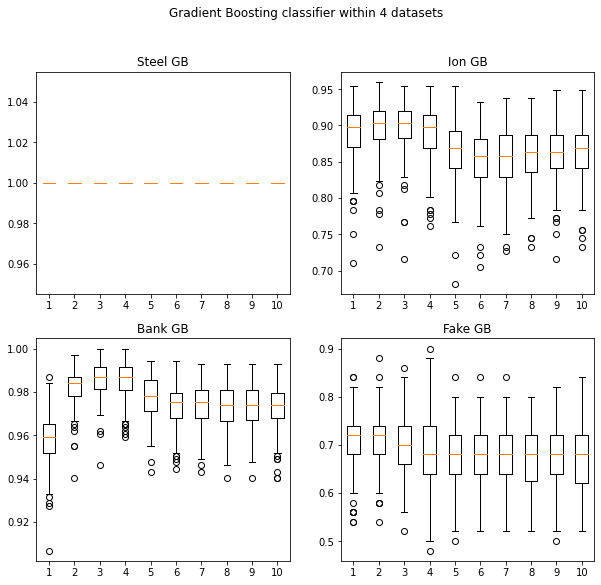

In [56]:
#figsize is the (width,length)
#subplot 2 rows, by 2 col.
fig, axs = plt.subplots(2,2,figsize=(10,9))
fig.suptitle('Gradient Boosting classifier within 4 datasets')
axs[0, 0].boxplot(STEEL_GB)
axs[0, 0].set_title('Steel GB')
axs[0, 1].boxplot(ION_GB)
axs[0, 1].set_title('Ion GB')
axs[1, 0].boxplot(BANK_GB)
axs[1, 0].set_title('Bank GB')
axs[1, 1].boxplot(FAKE_GB)
axs[1, 1].set_title('Fake GB')

plt.show()

## 6th classifier (RandomForestClassifier) on 4 datasets

In [57]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

boxlist_RF1_STEEL = []
boxlist_RF2_STEEL =[]
boxlist_RF3_STEEL =[]
boxlist_RF4_STEEL =[]
boxlist_RF5_STEEL =[]
boxlist_RF6_STEEL =[]
boxlist_RF7_STEEL =[]
boxlist_RF8_STEEL =[]
boxlist_RF9_STEEL =[]
boxlist_RF10_STEEL =[]

boxlist_RF1_ION = []
boxlist_RF2_ION = []
boxlist_RF3_ION = []
boxlist_RF4_ION = []
boxlist_RF5_ION = []
boxlist_RF6_ION = []
boxlist_RF7_ION = []
boxlist_RF8_ION = []
boxlist_RF9_ION = []
boxlist_RF10_ION = []

boxlist_RF1_BANK = []
boxlist_RF2_BANK = []
boxlist_RF3_BANK = []
boxlist_RF4_BANK = []
boxlist_RF5_BANK = []
boxlist_RF6_BANK = []
boxlist_RF7_BANK = []
boxlist_RF8_BANK = []
boxlist_RF9_BANK = []
boxlist_RF10_BANK = []


boxlist_RF1_FAKE = []
boxlist_RF2_FAKE = []
boxlist_RF3_FAKE = []
boxlist_RF4_FAKE = []
boxlist_RF5_FAKE = []
boxlist_RF6_FAKE = []
boxlist_RF7_FAKE = []
boxlist_RF8_FAKE = []
boxlist_RF9_FAKE = []
boxlist_RF10_FAKE = []

#Iterate over range of 250 splits.
for i in range(250): 
    train_set,test_set = train_test_split(steel, train_size=0.5, test_size=0.5, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop("Class", axis=1) # drop labels for training set
    y_train = train_set["Class"].copy()
    
    #same for test set
    X_test = test_set.drop("Class", axis=1)
    y_test = test_set["Class"].copy()
            
    #Preprocess after split
    X_train = StandardScaler().fit_transform(X_train) 
    X_test = StandardScaler().fit_transform(X_test) 
    
    #print("Split No.{}".format(i))
    for depth in range(1,11):
        rf = RandomForestClassifier(max_depth = depth).fit(X_train,y_train)
        rfscore = rf.score(X_test, y_test)
        if depth == 1:
            boxlist_RF1_STEEL.append(rfscore)
            #print("I've appended score {} at depth {}! to dt1".format(rfscore, depth))
            
        elif depth == 2:
            boxlist_RF2_STEEL.append(rfscore)
            #print("I've appended score {} at depth {}! to dt2".format(rfscore, depth))
            
        elif depth == 3:
            boxlist_RF3_STEEL.append(rfscore)
            #print("I've appended score {} at depth {}! to dt3".format(rfscore, depth))
            
        elif depth == 4:
            boxlist_RF4_STEEL.append(rfscore)
            #print("I've appended score {} at depth {}! to dt4".format(rfscore, depth))
            
        elif depth == 5:
            boxlist_RF5_STEEL.append(rfscore)
            #print("I've appended score {} at depth {}! to dt5".format(rfscore, depth))
            
        elif depth == 6:
            boxlist_RF6_STEEL.append(rfscore)
            #print("I've appended score {} at depth {}! to dt6".format(rfscore, depth))
            
        elif depth == 7:
            boxlist_RF7_STEEL.append(rfscore)
            #print("I've appended score {} at depth {}! to dt7".format(rfscore, depth))
            
        elif depth == 8:
            boxlist_RF8_STEEL.append(rfscore)
            #print("I've appended score {} at depth {}! to dt8".format(rfscore, depth))
            
        elif depth == 9:
            boxlist_RF9_STEEL.append(rfscore)
            #print("I've appended score {} at depth {}! to dt9".format(rfscore, depth))
            
        elif depth == 10:
            boxlist_RF10_STEEL.append(rfscore)
            #print("I've appended score {} at depth {}! to dt10".format(rfscore, depth))

            #Iterate over range of 250 splits.
for i in range(250): 
    train_set,test_set = train_test_split(ion, train_size=0.5, test_size=0.5, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop("class", axis=1) # drop labels for training set
    y_train = train_set["class"].copy()
    
    #same for test set
    X_test = test_set.drop("class", axis=1)
    y_test = test_set["class"].copy()
            
    #Preprocess after split
    X_train = StandardScaler().fit_transform(X_train) 
    X_test = StandardScaler().fit_transform(X_test) 
    
    
    #print("Split No.{}".format(i))
    for depth in range(1,11):
        rf = RandomForestClassifier(max_depth = depth).fit(X_train,y_train)
        rfscore = rf.score(X_test, y_test)
        if depth == 1:
            boxlist_RF1_ION.append(rfscore)
            #print("I've appended score {} at depth {}! to dt1".format(rfscore, depth))
            
        elif depth == 2:
            boxlist_RF2_ION.append(rfscore)
            #print("I've appended score {} at depth {}! to dt2".format(rfscore, depth))
            
        elif depth == 3:
            boxlist_RF3_ION.append(rfscore)
            #print("I've appended score {} at depth {}! to dt3".format(rfscore, depth))
            
        elif depth == 4:
            boxlist_RF4_ION.append(rfscore)
            #print("I've appended score {} at depth {}! to dt4".format(rfscore, depth))
            
        elif depth == 5:
            boxlist_RF5_ION.append(rfscore)
            #print("I've appended score {} at depth {}! to dt5".format(rfscore, depth))
            
        elif depth == 6:
            boxlist_RF6_ION.append(rfscore)
            #print("I've appended score {} at depth {}! to dt6".format(rfscore, depth))
            
        elif depth == 7:
            boxlist_RF7_ION.append(rfscore)
            #print("I've appended score {} at depth {}! to dt7".format(rfscore, depth))
            
        elif depth == 8:
            boxlist_RF8_ION.append(rfscore)
            #print("I've appended score {} at depth {}! to dt8".format(rfscore, depth))
            
        elif depth == 9:
            boxlist_RF9_ION.append(rfscore)
            #print("I've appended score {} at depth {}! to dt9".format(rfscore, depth))
            
        elif depth == 10:
            boxlist_RF10_ION.append(rfscore)
            #print("I've appended score {} at depth {}! to dt10".format(rfscore, depth))
            
            
#Iterate over range of 250 splits.
for i in range(250): 
    train_set,test_set = train_test_split(bank, train_size=0.5, test_size=0.5, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop("Class", axis=1) # drop labels for training set
    y_train = train_set["Class"].copy()
    
    #same for test set
    X_test = test_set.drop("Class", axis=1)
    y_test = test_set["Class"].copy()
            
    #Preprocess after split
    X_train = StandardScaler().fit_transform(X_train) 
    X_test = StandardScaler().fit_transform(X_test) 
    
    #print("Split No.{}".format(i))
    for depth in range(1,11):
        rf = RandomForestClassifier(max_depth = depth).fit(X_train,y_train)
        rfscore = rf.score(X_test, y_test)
        if depth == 1:
            boxlist_RF1_BANK.append(rfscore)
            #print("I've appended score {} at depth {}! to dt1".format(rfscore, depth))
            
        elif depth == 2:
            boxlist_RF2_BANK.append(rfscore)
            #print("I've appended score {} at depth {}! to dt2".format(rfscore, depth))
            
        elif depth == 3:
            boxlist_RF3_BANK.append(rfscore)
            #print("I've appended score {} at depth {}! to dt3".format(rfscore, depth))
            
        elif depth == 4:
            boxlist_RF4_BANK.append(rfscore)
            #print("I've appended score {} at depth {}! to dt4".format(rfscore, depth))
            
        elif depth == 5:
            boxlist_RF5_BANK.append(rfscore)
            #print("I've appended score {} at depth {}! to dt5".format(rfscore, depth))
            
        elif depth == 6:
            boxlist_RF6_BANK.append(rfscore)
            #print("I've appended score {} at depth {}! to dt6".format(rfscore, depth))
            
        elif depth == 7:
            boxlist_RF7_BANK.append(rfscore)
            #print("I've appended score {} at depth {}! to dt7".format(rfscore, depth))
            
        elif depth == 8:
            boxlist_RF8_BANK.append(rfscore)
            #print("I've appended score {} at depth {}! to dt8".format(rfscore, depth))
            
        elif depth == 9:
            boxlist_RF9_BANK.append(rfscore)
            #print("I've appended score {} at depth {}! to dt9".format(rfscore, depth))
            
        elif depth == 10:
            boxlist_RF10_BANK.append(rfscore)
            #print("I've appended score {} at depth {}! to dt10".format(rfscore, depth))
            
            
#Iterate over range of 250 splits.
for i in range(250): 
    train_set,test_set = train_test_split(fake, train_size=0.5, test_size=0.5, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop(20, axis=1) # drop labels for training set
    y_train = train_set[20].copy()
    
    #same for test set
    X_test = test_set.drop(20, axis=1)
    y_test = test_set[20].copy()
            
    #Preprocess after split
    X_train = StandardScaler().fit_transform(X_train) 
    X_test = StandardScaler().fit_transform(X_test) 
    
    
    #print("Split No.{}".format(i))
    for depth in range(1,11):
        rf = RandomForestClassifier(max_depth = depth).fit(X_train,y_train)
        rfscore = rf.score(X_test, y_test)
        if depth == 1:
            boxlist_RF1_FAKE.append(rfscore)
            #print("I've appended score {} at depth {}! to dt1".format(rfscore, depth))
            
        elif depth == 2:
            boxlist_RF2_FAKE.append(rfscore)
            #print("I've appended score {} at depth {}! to dt2".format(rfscore, depth))
            
        elif depth == 3:
            boxlist_RF3_FAKE.append(rfscore)
            #print("I've appended score {} at depth {}! to dt3".format(rfscore, depth))
            
        elif depth == 4:
            boxlist_RF4_FAKE.append(rfscore)
            #print("I've appended score {} at depth {}! to dt4".format(rfscore, depth))
            
        elif depth == 5:
            boxlist_RF5_FAKE.append(rfscore)
            #print("I've appended score {} at depth {}! to dt5".format(rfscore, depth))
            
        elif depth == 6:
            boxlist_RF6_FAKE.append(rfscore)
            #print("I've appended score {} at depth {}! to dt6".format(rfscore, depth))
            
        elif depth == 7:
            boxlist_RF7_FAKE.append(rfscore)
            #print("I've appended score {} at depth {}! to dt7".format(rfscore, depth))
            
        elif depth == 8:
            boxlist_RF8_FAKE.append(rfscore)
            #print("I've appended score {} at depth {}! to dt8".format(rfscore, depth))
            
        elif depth == 9:
            boxlist_RF9_FAKE.append(rfscore)
            #print("I've appended score {} at depth {}! to dt9".format(rfscore, depth))
            
        elif depth == 10:
            boxlist_RF10_FAKE.append(rfscore)
            #print("I've appended score {} at depth {}! to dt10".format(rfscore, depth))
            

# Validation Errors Random Forest 

In [58]:
print(1-np.mean(boxlist_RF1_STEEL))
print(1-np.mean(boxlist_RF2_STEEL))
print(1-np.mean(boxlist_RF3_STEEL))
print(1-np.mean(boxlist_RF4_STEEL))
print(1-np.mean(boxlist_RF5_STEEL))
print(1-np.mean(boxlist_RF6_STEEL))
print(1-np.mean(boxlist_RF7_STEEL))
print(1-np.mean(boxlist_RF8_STEEL))
print(1-np.mean(boxlist_RF9_STEEL))
print(1-np.mean(boxlist_RF10_STEEL))

VAL_RF_STEEL = min(1-np.mean(boxlist_RF1_STEEL),
                    1-np.mean(boxlist_RF2_STEEL),
                    1-np.mean(boxlist_RF3_STEEL),
                    1-np.mean(boxlist_RF4_STEEL),
                    1-np.mean(boxlist_RF5_STEEL),
                    1-np.mean(boxlist_RF6_STEEL),
                    1-np.mean(boxlist_RF7_STEEL),
                    1-np.mean(boxlist_RF8_STEEL),
                    1-np.mean(boxlist_RF9_STEEL),
                    1-np.mean(boxlist_RF10_STEEL))  
print(VAL_RF_STEEL)

0.3466076210092688
0.28271472708547885
0.18494747682801238
0.1297507723995881
0.09127909371781673
0.06730381050463441
0.05124613800205979
0.039699279093717954
0.03281565396498454
0.028935118434603502
0.028935118434603502


In [59]:
print(1-np.mean(boxlist_RF1_ION))
print(1-np.mean(boxlist_RF2_ION))
print(1-np.mean(boxlist_RF3_ION))
print(1-np.mean(boxlist_RF4_ION))
print(1-np.mean(boxlist_RF5_ION))
print(1-np.mean(boxlist_RF6_ION))
print(1-np.mean(boxlist_RF7_ION))
print(1-np.mean(boxlist_RF8_ION))
print(1-np.mean(boxlist_RF9_ION))
print(1-np.mean(boxlist_RF10_ION))

VAL_RF_ION = min(1-np.mean(boxlist_RF1_ION),
                    1-np.mean(boxlist_RF2_ION),
                    1-np.mean(boxlist_RF3_ION),
                    1-np.mean(boxlist_RF4_ION),
                    1-np.mean(boxlist_RF5_ION),
                    1-np.mean(boxlist_RF6_ION),
                    1-np.mean(boxlist_RF7_ION),
                    1-np.mean(boxlist_RF8_ION),
                    1-np.mean(boxlist_RF9_ION),
                    1-np.mean(boxlist_RF10_ION))  
print(VAL_RF_ION)

0.19897727272727272
0.13004545454545458
0.10311363636363646
0.08884090909090914
0.08397727272727273
0.08086363636363636
0.0808181818181819
0.07952272727272724
0.07893181818181827
0.07934090909090896
0.07893181818181827


In [60]:
print(1-np.mean(boxlist_RF1_BANK))
print(1-np.mean(boxlist_RF2_BANK))
print(1-np.mean(boxlist_RF3_BANK))
print(1-np.mean(boxlist_RF4_BANK))
print(1-np.mean(boxlist_RF5_BANK))
print(1-np.mean(boxlist_RF6_BANK))
print(1-np.mean(boxlist_RF7_BANK))
print(1-np.mean(boxlist_RF8_BANK))
print(1-np.mean(boxlist_RF9_BANK))
print(1-np.mean(boxlist_RF10_BANK))

VAL_RF_BANK = min(1-np.mean(boxlist_RF1_BANK),
                    1-np.mean(boxlist_RF2_BANK),
                    1-np.mean(boxlist_RF3_BANK),
                    1-np.mean(boxlist_RF4_BANK),
                    1-np.mean(boxlist_RF5_BANK),
                    1-np.mean(boxlist_RF6_BANK),
                    1-np.mean(boxlist_RF7_BANK),
                    1-np.mean(boxlist_RF8_BANK),
                    1-np.mean(boxlist_RF9_BANK),
                    1-np.mean(boxlist_RF10_BANK))  
print(VAL_RF_BANK)

0.12862390670553936
0.07695043731778428
0.05024489795918363
0.03434402332361519
0.021690962099125355
0.01595918367346938
0.013825072886297418
0.013212827988338227
0.013084548104956295
0.013067055393586102
0.013067055393586102


In [61]:
print(1-np.mean(boxlist_RF1_FAKE))
print(1-np.mean(boxlist_RF2_FAKE))
print(1-np.mean(boxlist_RF3_FAKE))
print(1-np.mean(boxlist_RF4_FAKE))
print(1-np.mean(boxlist_RF5_FAKE))
print(1-np.mean(boxlist_RF6_FAKE))
print(1-np.mean(boxlist_RF7_FAKE))
print(1-np.mean(boxlist_RF8_FAKE))
print(1-np.mean(boxlist_RF9_FAKE))
print(1-np.mean(boxlist_RF10_FAKE))

VAL_RF_FAKE = min(1-np.mean(boxlist_RF1_FAKE),
                    1-np.mean(boxlist_RF2_FAKE),
                    1-np.mean(boxlist_RF3_FAKE),
                    1-np.mean(boxlist_RF4_FAKE),
                    1-np.mean(boxlist_RF5_FAKE),
                    1-np.mean(boxlist_RF6_FAKE),
                    1-np.mean(boxlist_RF7_FAKE),
                    1-np.mean(boxlist_RF8_FAKE),
                    1-np.mean(boxlist_RF9_FAKE),
                    1-np.mean(boxlist_RF10_FAKE))  
print(VAL_RF_FAKE)

0.33631999999999995
0.30872
0.30312000000000017
0.29832000000000003
0.29888000000000015
0.29536000000000007
0.30104
0.30096
0.2978399999999999
0.29935999999999996
0.29536000000000007


# Boxplot of Random Forest Classifier

In [62]:
#Code for boxplots.
boxlist_RF1_STEEL = pd.DataFrame(boxlist_RF1_STEEL)
boxlist_RF2_STEEL = pd.DataFrame(boxlist_RF2_STEEL)
boxlist_RF3_STEEL = pd.DataFrame(boxlist_RF3_STEEL)
boxlist_RF4_STEEL = pd.DataFrame(boxlist_RF4_STEEL)
boxlist_RF5_STEEL = pd.DataFrame(boxlist_RF5_STEEL)
boxlist_RF6_STEEL = pd.DataFrame(boxlist_RF6_STEEL)
boxlist_RF7_STEEL = pd.DataFrame(boxlist_RF7_STEEL)
boxlist_RF8_STEEL = pd.DataFrame(boxlist_RF8_STEEL)
boxlist_RF9_STEEL = pd.DataFrame(boxlist_RF9_STEEL)
boxlist_RF10_STEEL = pd.DataFrame(boxlist_RF10_STEEL)

boxlist_RF1_ION = pd.DataFrame(boxlist_RF1_ION)
boxlist_RF2_ION = pd.DataFrame(boxlist_RF2_ION)
boxlist_RF3_ION = pd.DataFrame(boxlist_RF3_ION)
boxlist_RF4_ION = pd.DataFrame(boxlist_RF4_ION)
boxlist_RF5_ION = pd.DataFrame(boxlist_RF5_ION)
boxlist_RF6_ION = pd.DataFrame(boxlist_RF6_ION)
boxlist_RF7_ION = pd.DataFrame(boxlist_RF7_ION)
boxlist_RF8_ION = pd.DataFrame(boxlist_RF8_ION)
boxlist_RF9_ION = pd.DataFrame(boxlist_RF9_ION)
boxlist_RF10_ION = pd.DataFrame(boxlist_RF10_ION)

boxlist_RF1_BANK = pd.DataFrame(boxlist_RF1_BANK)
boxlist_RF2_BANK = pd.DataFrame(boxlist_RF2_BANK)
boxlist_RF3_BANK = pd.DataFrame(boxlist_RF3_BANK)
boxlist_RF4_BANK = pd.DataFrame(boxlist_RF4_BANK)
boxlist_RF5_BANK = pd.DataFrame(boxlist_RF5_BANK)
boxlist_RF6_BANK = pd.DataFrame(boxlist_RF6_BANK)
boxlist_RF7_BANK = pd.DataFrame(boxlist_RF7_BANK)
boxlist_RF8_BANK = pd.DataFrame(boxlist_RF8_BANK)
boxlist_RF9_BANK = pd.DataFrame(boxlist_RF9_BANK)
boxlist_RF10_BANK = pd.DataFrame(boxlist_RF10_BANK)

boxlist_RF1_FAKE = pd.DataFrame(boxlist_RF1_FAKE)
boxlist_RF2_FAKE = pd.DataFrame(boxlist_RF2_FAKE)
boxlist_RF3_FAKE = pd.DataFrame(boxlist_RF3_FAKE)
boxlist_RF4_FAKE = pd.DataFrame(boxlist_RF4_FAKE)
boxlist_RF5_FAKE = pd.DataFrame(boxlist_RF5_FAKE)
boxlist_RF6_FAKE = pd.DataFrame(boxlist_RF6_FAKE)
boxlist_RF7_FAKE = pd.DataFrame(boxlist_RF7_FAKE)
boxlist_RF8_FAKE = pd.DataFrame(boxlist_RF8_FAKE)
boxlist_RF9_FAKE = pd.DataFrame(boxlist_RF9_FAKE)
boxlist_RF10_FAKE = pd.DataFrame(boxlist_RF10_FAKE)



data1 = [boxlist_RF1_STEEL,
         boxlist_RF2_STEEL,
         boxlist_RF3_STEEL,
         boxlist_RF4_STEEL,
         boxlist_RF5_STEEL,
         boxlist_RF6_STEEL,
         boxlist_RF7_STEEL,
         boxlist_RF8_STEEL,
         boxlist_RF9_STEEL,
         boxlist_RF10_STEEL]


data2 =[boxlist_RF1_ION,
       boxlist_RF2_ION,
       boxlist_RF3_ION,
       boxlist_RF4_ION,
       boxlist_RF5_ION,
       boxlist_RF6_ION,
       boxlist_RF7_ION,
       boxlist_RF8_ION,
       boxlist_RF9_ION,
       boxlist_RF10_ION,]

data3 =[boxlist_RF1_BANK,
       boxlist_RF2_BANK,
       boxlist_RF3_BANK,
       boxlist_RF4_BANK,
       boxlist_RF5_BANK,
       boxlist_RF6_BANK,
       boxlist_RF7_BANK,
       boxlist_RF8_BANK,
       boxlist_RF9_BANK,
       boxlist_RF10_BANK,]

data4 =[boxlist_RF1_FAKE,
       boxlist_RF2_FAKE,
       boxlist_RF3_FAKE,
       boxlist_RF4_FAKE,
       boxlist_RF5_FAKE,
       boxlist_RF6_FAKE,
       boxlist_RF7_FAKE,
       boxlist_RF8_FAKE,
       boxlist_RF9_FAKE,
       boxlist_RF10_FAKE]

RF_headers = ["1","2","3","4","5","6","7","8","9","10"]

STEEL_RF = pd.concat(data1, axis=1, keys=RF_headers)
ION_RF = pd.concat(data2, axis=1, keys=RF_headers)
BANK_RF = pd.concat(data3, axis=1, keys=RF_headers)
FAKE_RF = pd.concat(data4, axis=1, keys=RF_headers)

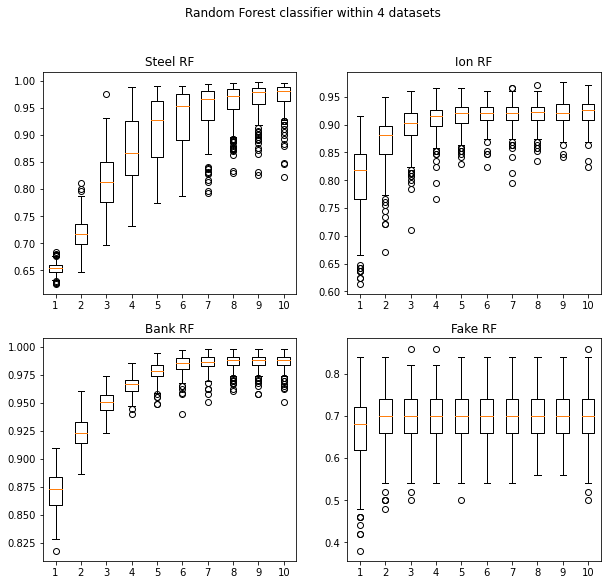

In [63]:
#figsize is the (width,length)
#subplot 2 rows, by 2 col.
fig, axs = plt.subplots(2,2,figsize=(10,9))
fig.suptitle('Random Forest classifier within 4 datasets')
axs[0, 0].boxplot(STEEL_RF)
axs[0, 0].set_title('Steel RF')
axs[0, 1].boxplot(ION_RF)
axs[0, 1].set_title('Ion RF')
axs[1, 0].boxplot(BANK_RF)
axs[1, 0].set_title('Bank RF')
axs[1, 1].boxplot(FAKE_RF)
axs[1, 1].set_title('Fake RF')

plt.show()

# 7th classifier (MLPClassifier) on 4 datasets

In [64]:
from sklearn.neural_network import MLPClassifier

#Empty list for boxplot
boxlist_MLP1 = []
boxlist_MLP2 = []
boxlist_MLP3 = []
boxlist_MLP4 = []

count = 1
for ds in datasets: 

    #Iterate over range of 250 splits.
    for j in range(250): 
        
            
        # preprocess dataset, split into training and test part
        train_set,test_set = train_test_split(ds, train_size=0.5, test_size=0.5, random_state=j)
        

        #If count is one then we know its the steel dataset
        if count==1:
            #print("i'm on dataset {}!\n".format(count))
            
            #Same for train set(Target is Class)
            X_train = train_set.drop("Class", axis=1) # drop labels for training set
            y_train = train_set["Class"].copy()
    
            #same for test set
            X_test = test_set.drop("Class", axis=1)
            y_test = test_set["Class"].copy()
            
            #Preprocess after split
            X_train = StandardScaler().fit_transform(X_train) 
            X_test = StandardScaler().fit_transform(X_test) 
                
        #If count is one then we know its the ion 
        elif count==2:
            #print("i'm on dataset {}!\n".format(count))
            
            #Same for train set(Target is Class)
            X_train = train_set.drop("class", axis=1) # drop labels for training set
            y_train = train_set["class"].copy()

            #same for test set
            X_test = test_set.drop("class", axis=1)
            y_test = test_set["class"].copy()
            
            #Preprocess after split
            X_train = StandardScaler().fit_transform(X_train) 
            X_test = StandardScaler().fit_transform(X_test) 
            
            
        #If count is one then we know its the bank
        elif count==3:
            #print("i'm on dataset {}!\n".format(count))
            
            #Same for train set(Target is Class)
            X_train = train_set.drop("Class", axis=1) # drop labels for training set
            y_train = train_set["Class"].copy()

            #same for test set
            X_test = test_set.drop("Class", axis=1)
            y_test = test_set["Class"].copy()
            
            #Preprocess after split
            X_train = StandardScaler().fit_transform(X_train) 
            X_test = StandardScaler().fit_transform(X_test) 
               
            
            
        #If count is one then we know its the fake dataset
        elif count==4:
            #print("i'm on dataset {}!\n".format(count))
            
            #Same for train set(Target is Class)
            X_train = train_set.drop(20, axis=1) # drop labels for training set
            y_train = train_set[20].copy()

            #same for test set
            X_test = test_set.drop(20, axis=1)
            y_test = test_set[20].copy()
            
            #Preprocess after split
            X_train = StandardScaler().fit_transform(X_train) 
            X_test = StandardScaler().fit_transform(X_test) 
        
    
        mlp1 = MLPClassifier(alpha = 1e-5).fit(X_train,y_train)
        mlpscore1 = mlp1.score(X_test, y_test)
        boxlist_MLP1.append(mlpscore1)
        #print("Split No.{} appended {} to mlp1!".format(j, mlpscore1))
        
        mlp2 = MLPClassifier(alpha = 1e-3).fit(X_train,y_train)
        mlpscore2 = mlp2.score(X_test, y_test)
        boxlist_MLP2.append(mlpscore2)
        #print("Split No.{} appended {} to mlp2!".format(j, mlpscore2))
    
        mlp3 = MLPClassifier(alpha = 0.1).fit(X_train,y_train)
        mlpscore3 = mlp3.score(X_test, y_test)
        boxlist_MLP3.append(mlpscore3)
        #print("Split No.{} appended {} to mlp3!".format(j, mlpscore3))
    
        mlp4 = MLPClassifier(alpha = 10.0).fit(X_train,y_train)
        mlpscore4 = mlp4.score(X_test, y_test)
        boxlist_MLP4.append(mlpscore4)
        #print("Split No.{} appended {} to mlp4!".format(j, mlpscore4))
    
    count+=1
        
        

C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

# Validation Errors MLP 

In [65]:
steel_mlp1 = boxlist_MLP1[0:250]
steel_mlp2 = boxlist_MLP2[0:250]
steel_mlp3 = boxlist_MLP3[0:250]
steel_mlp4 = boxlist_MLP4[0:250]


ion_mlp1 = boxlist_MLP1[250:500]
ion_mlp2 = boxlist_MLP2[250:500]
ion_mlp3 = boxlist_MLP3[250:500]
ion_mlp4 = boxlist_MLP4[250:500]


bank_mlp1 = boxlist_MLP1[500:750]
bank_mlp2 = boxlist_MLP2[500:750]
bank_mlp3 = boxlist_MLP3[500:750]
bank_mlp4 = boxlist_MLP4[500:750]

fake_mlp1 = boxlist_MLP1[750:1000]
fake_mlp2 = boxlist_MLP2[750:1000]
fake_mlp3 = boxlist_MLP3[750:1000]
fake_mlp4 = boxlist_MLP4[750:1000]

In [66]:
print(1-np.mean(steel_mlp1))
print(1-np.mean(steel_mlp2))
print(1-np.mean(steel_mlp3))
print(1-np.mean(steel_mlp4))

VAL_MLP_STEEL = min(1-np.mean(steel_mlp1),1-np.mean(steel_mlp2),1-np.mean(steel_mlp3),1-np.mean(steel_mlp4))  
print(VAL_MLP_STEEL)

0.0015612770339855642
0.0014994850669411974
0.0011040164778578498
0.0011658084449022166
0.0011040164778578498


In [67]:
print(1-np.mean(ion_mlp1))
print(1-np.mean(ion_mlp2))
print(1-np.mean(ion_mlp3))
print(1-np.mean(ion_mlp4))

VAL_MLP_ION = min(1-np.mean(ion_mlp1),1-np.mean(ion_mlp2),1-np.mean(ion_mlp3),1-np.mean(ion_mlp4))  
print(VAL_MLP_ION)

0.10356818181818173
0.1045454545454545
0.10443181818181813
0.11854545454545451
0.10356818181818173


In [68]:
print(1-np.mean(bank_mlp1))
print(1-np.mean(bank_mlp2))
print(1-np.mean(bank_mlp3))
print(1-np.mean(bank_mlp4))

VAL_MLP_BANK = min(1-np.mean(bank_mlp1),1-np.mean(bank_mlp2),1-np.mean(bank_mlp3),1-np.mean(bank_mlp4))  
print(VAL_MLP_BANK)

0.002513119533527619
0.002594752186589
0.0035743440233236834
0.031393586005830865
0.002513119533527619


In [69]:
print(1-np.mean(fake_mlp1))
print(1-np.mean(fake_mlp2))
print(1-np.mean(fake_mlp3))
print(1-np.mean(fake_mlp4))

VAL_MLP_FAKE = min(1-np.mean(fake_mlp1),1-np.mean(fake_mlp2),1-np.mean(fake_mlp3),1-np.mean(fake_mlp4))  
print(VAL_MLP_FAKE)

0.33664000000000005
0.33199999999999996
0.32975999999999994
0.30384
0.30384


# Boxplot for MLP classifier

In [70]:
boxlist_MLP1 = pd.DataFrame(boxlist_MLP1)
boxlist_MLP2 = pd.DataFrame(boxlist_MLP2)
boxlist_MLP3 = pd.DataFrame(boxlist_MLP3)
boxlist_MLP4 = pd.DataFrame(boxlist_MLP4)

In [71]:
steel_mlp1 = boxlist_MLP1[0:250]
steel_mlp2 = boxlist_MLP2[0:250]
steel_mlp3 = boxlist_MLP3[0:250]
steel_mlp4 = boxlist_MLP4[0:250]


ion_mlp1 = boxlist_MLP1[250:500]
ion_mlp2 = boxlist_MLP2[250:500]
ion_mlp3 = boxlist_MLP3[250:500]
ion_mlp4 = boxlist_MLP4[250:500]


bank_mlp1 = boxlist_MLP1[500:750]
bank_mlp2 = boxlist_MLP2[500:750]
bank_mlp3 = boxlist_MLP3[500:750]
bank_mlp4 = boxlist_MLP4[500:750]

fake_mlp1 = boxlist_MLP1[750:1000]
fake_mlp2 = boxlist_MLP2[750:1000]
fake_mlp3 = boxlist_MLP3[750:1000]
fake_mlp4 = boxlist_MLP4[750:1000]


#Code for boxplots.
steel_mlp1 = pd.DataFrame(steel_mlp1)
steel_mlp2 = pd.DataFrame(steel_mlp2)
steel_mlp3 = pd.DataFrame(steel_mlp3)
steel_mlp4 = pd.DataFrame(steel_mlp4)

ion_mlp1 = pd.DataFrame(ion_mlp1)
ion_mlp2 = pd.DataFrame(ion_mlp2)
ion_mlp3 = pd.DataFrame(ion_mlp3)
ion_mlp4 = pd.DataFrame(ion_mlp4)

bank_mlp1 = pd.DataFrame(bank_mlp1)
bank_mlp2 = pd.DataFrame(bank_mlp2)
bank_mlp3 = pd.DataFrame(bank_mlp3)
bank_mlp4 = pd.DataFrame(bank_mlp4)

fake_mlp1 = pd.DataFrame(fake_mlp1)
fake_mlp2 = pd.DataFrame(fake_mlp2)
fake_mlp3 = pd.DataFrame(fake_mlp3)
fake_mlp4 = pd.DataFrame(fake_mlp4)

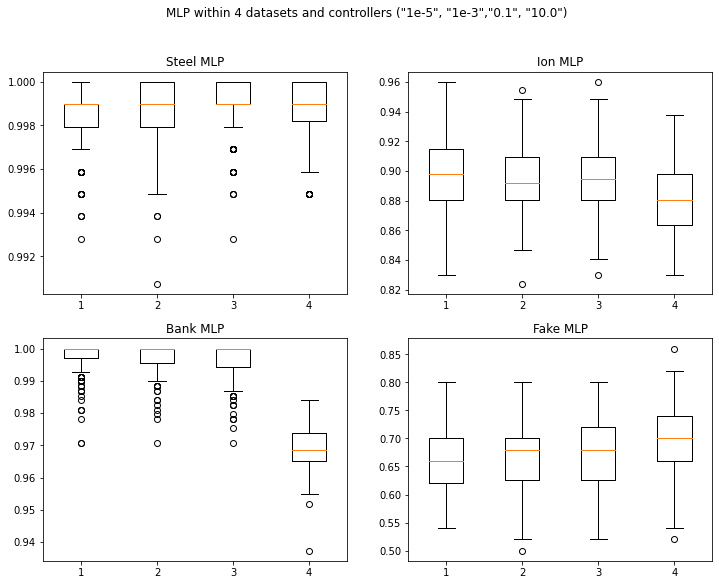

In [72]:

data1 = [steel_mlp1, steel_mlp2, steel_mlp3, steel_mlp4]
data2 = [ion_mlp1, ion_mlp2, ion_mlp3, ion_mlp4]
data3 = [bank_mlp1, bank_mlp2, bank_mlp3, bank_mlp4]
data4 = [fake_mlp1,fake_mlp2,fake_mlp3, fake_mlp4]

mlp_headers = ["1e-5", "1e-3","0.1", "10.0"]

STEEL_MLP = pd.concat(data1, axis=1, keys=mlp_headers)
ION_MLP = pd.concat(data2, axis=1, keys=mlp_headers)
BANK_MLP = pd.concat(data3, axis=1, keys=mlp_headers)
FAKE_MLP = pd.concat(data4, axis=1, keys=mlp_headers)

#figsize is the (width,length)
#subplot 2 rows, by 2 col.
fig, axs = plt.subplots(2,2,figsize=(12,9))
fig.suptitle('MLP within 4 datasets and controllers ("1e-5", "1e-3","0.1", "10.0")')
axs[0, 0].boxplot(STEEL_MLP)
axs[0, 0].set_title('Steel MLP')
axs[0, 1].boxplot(ION_MLP)
axs[0, 1].set_title('Ion MLP')
axs[1, 0].boxplot(BANK_MLP)
axs[1, 0].set_title('Bank MLP')
axs[1, 1].boxplot(FAKE_MLP)
axs[1, 1].set_title('Fake MLP')

plt.show()


# Overall Summary

Write a paragraph summarising the overall results, as captured in these two tables.
Include two summary tables, with rows being models, and columns being datasets:
Table I is to contain the best average value (of validation error).
Table II is to contain the associated (ie. best) value for the control parameter.
If you notice something unexpected, point it out, explaining why you think it is worth mentioning.

KNN - There are no outstanding outliers. All the boxplots are generally similar, except for the bank and dataset. The average score for each knn(1-5) against the bank dataset is near 1. Which is extremely high score.

Gaussian - Steel and Ion stand out the most against the Gaussian classifier. Steel and Ion has extremely low score when paired with controller variables "1e-9", "1e-5". Although when the controller is 1e-1 Steel and ion is relatively high score. There are no considerable changes in the Bank and fake datasets across different gaussian control variables. There are alot of high value outliers for steel and ion at "1e-5".

Logistic Regression - Everything looks generally the same across all datasets. Except steel which is relatively averagely high across all controll variables. Bank and ion were all rounder high average scores that were consistent

Decision Tree - General trend that overall score increases as controller variable increases. Except fake dataset. Steel DT gives basically a score of 1.

Gradient Boosting - Steel gives 1 across all controller variables used. Although ion and bank dataset do better in the first 4 controller variables, but become less effective as the controller variable number increases.

Random Forest - apart from fake dataset, all datasets improved in score and accuracy the more controller variable number increased.

Mlp - Interesting boxplots were found in the steel and bank dataset, as their averages were close to perfect 1. ion and fake were generally normal and consistent.

## TABLE 1(validation) and TABLE 2(best controller variable) SUMMARY

Its expected that gradient booster and decision tree have a validation error of 0. As it could not be improved any further. Its also expected to see the Fake dataset have worse overall validation scores as it is a synthetically made dataset..

In [73]:
#Table 1 consists of Best Validation Errors.
compare_models = pd.DataFrame(
    {  'Classifier/Dataset' : ['KNN', 'GaussianNB','Logistic','Decision Tree','Gradient Boosting','Random Forest','MLP'],
       'Steel' : [VAL_KNN_STEEL,VAL_GAUSS_STEEL,VAL_LOG_STEEL,VAL_DT_STEEL,VAL_GB_STEEL,VAL_RF_STEEL,VAL_MLP_STEEL],
       'Ion' : [VAL_KNN_ION,VAL_GAUSS_ION,VAL_LOG_ION,VAL_DT_ION,VAL_GB_ION,VAL_RF_ION,VAL_MLP_ION],
       'Bank' : [VAL_KNN_BANK,VAL_GAUSS_BANK,VAL_LOG_BANK,VAL_DT_BANK,VAL_GB_BANK,VAL_RF_BANK,VAL_MLP_BANK],
       'Fake' : [VAL_KNN_FAKE,VAL_GAUSS_FAKE,VAL_LOG_FAKE,VAL_DT_FAKE,VAL_GB_FAKE,VAL_RF_FAKE,VAL_MLP_FAKE],

    })

print(compare_models)

  Classifier/Dataset     Steel       Ion      Bank     Fake
0                KNN  0.018381  0.122545  0.001434  0.35104
1         GaussianNB  0.011440  0.144091  0.158420  0.27832
2           Logistic  0.000465  0.130432  0.017557  0.29288
3      Decision Tree  0.000000  0.138773  0.027265  0.32760
4  Gradient Boosting  0.000000  0.101977  0.013848  0.28776
5      Random Forest  0.028935  0.078932  0.013067  0.29536
6                MLP  0.001104  0.103568  0.002513  0.30384


In [74]:
#Table 2 consists of Best Value of control parameters.
compare_models2 = pd.DataFrame(
    {  'Classifier' : ['KNN', 'GaussianNB','Logistic','Decision Tree','Gradient Boosting','Random Forest','MLP'],
       'Steel' : [1,1e-1,5.0,'>5','1-10',10,0.1],
       'Ion' : [2,1e-1,"0.5 or 5",7,3,10,0.1],
       'Bank' : [2,"1e-9 or 1e-5",5.0,9,3,9,1e-5],
       'Fake' : [5,'1e-9 or 1e-5',5.0,1,1,9,10.0],

    })
compare_models2

,Classifier,Steel,Ion,Bank,Fake
0,KNN,1,2,2,5
1,GaussianNB,0.1,0.1,1e-9 or 1e-5,1e-9 or 1e-5
2,Logistic,5,0.5 or 5,5,5
3,Decision Tree,>5,7,9,1
4,Gradient Boosting,1-10,3,3,1
5,Random Forest,10,10,9,9
6,MLP,0.1,0.1,1e-05,10


# Part 2: clustering, for semi-supervised learning

# Iris with and without cluster column

In [75]:
from sklearn.cluster import KMeans

iriscol = pd.read_csv("C:/Users/GGPC/Desktop/comp309/iris.csv")
noiriscol = pd.read_csv("C:/Users/GGPC/Desktop/comp309/iris.csv")

In [76]:
iriscol.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


use KMeans(n_clusters=3) (ie. k-means with k=3) as the cluster method, run on the whole dataset, and add the cluster label as a new column in X. Then,

In [77]:
from sklearn.naive_bayes import GaussianNB
#After 
#for at least a hundred repeats
#randomly split the iris dataset (as above)
#train GaussianNB() Classifiers on the training data
#without the cluster column
#with the cluster column
#find and store the test-set scores of (i) and (ii)

#Test scores, with column
coltest=[]

for i in range(100): 
    
    #Add the cluster column
    #use KMeans(n_clusters=3) (ie. k-means with k=3) as the cluster method
    kmeans = KMeans(n_clusters=3)
    
    #Obtain the values for columns 1-4.exclude class column.
    kmeans.fit(iriscol.iloc[:, [0,1,2,3]].values)
    
    #add cluster column to iris, This will be the dataset used for The first 100 repeats.
    iriscol['cluster'] = kmeans.labels_
    
    train_set,test_set = train_test_split(iriscol, train_size=0.05, test_size=0.95, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop("class", axis=1) # drop labels for training set
    y_train = train_set["class"].copy()
    
    #same for test set
    X_test = test_set.drop("class", axis=1)
    y_test = test_set["class"].copy()
    
    #find and store the test-set scores of (i) (With cluster column)
    #train GaussianNB() Classifiers on the training data
    clf = GaussianNB()
    clf.fit(X_train,y_train)
    clfscore = clf.score(X_test, y_test)
    coltest.append(clfscore)
    

In [78]:
#Test scores, with column
nocoltest=[]

for i in range(100): 
    
    train_set,test_set = train_test_split(noiriscol, train_size=0.05, test_size=0.95, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop("class", axis=1) # drop labels for training set
    y_train = train_set["class"].copy()
    
    #same for test set
    X_test = test_set.drop("class", axis=1)
    y_test = test_set["class"].copy()
    
    #find and store the test-set scores of (i) (With cluster column)
    #train GaussianNB() Classifiers on the training data
    clf = GaussianNB()
    clf.fit(X_train,y_train)
    clfscore = clf.score(X_test, y_test)
    nocoltest.append(clfscore)
    

plot a scatterplot of the (i)-scores on x-axis against the (ii)-scores on the y-axis. So if the cluster label tends to help, there will be more points above the diagonal than below it.

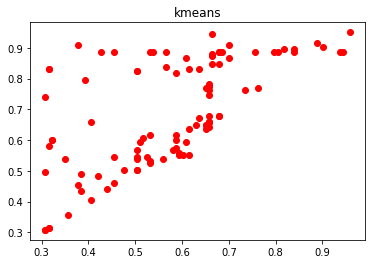

In [79]:
plt.scatter(nocoltest,coltest,c="r")
plt.title("kmeans")
plt.show()

# Bank with and without cluster column

In [80]:
bank = pd.read_csv("C:/Users/GGPC/Desktop/comp309/banknote-authentication.csv")
nobank = pd.read_csv("C:/Users/GGPC/Desktop/comp309/banknote-authentication.csv")

In [81]:
bank.shape

(1372, 5)

In [82]:
from sklearn.naive_bayes import GaussianNB
#After 
#for at least a hundred repeats
#randomly split the iris dataset (as above)
#train GaussianNB() Classifiers on the training data
#without the cluster column
#with the cluster column
#find and store the test-set scores of (i) and (ii)

#Test scores, with column
bankcoltest=[]

for i in range(100): 
    
    #Add the cluster column
    #use KMeans(n_clusters=3) (ie. k-means with k=3) as the cluster method
    kmeans = KMeans(n_clusters=3)
    
    #Obtain the values for columns 1-4.exclude class column.
    kmeans.fit(bank.iloc[:, [0,1,2,3]].values)
    
    #add cluster column to iris, This will be the dataset used for The first 100 repeats.
    bank['cluster'] = kmeans.labels_
    
    train_set,test_set = train_test_split(bank, train_size=0.05, test_size=0.95, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop("Class", axis=1) # drop labels for training set
    y_train = train_set["Class"].copy()
    
    #same for test set
    X_test = test_set.drop("Class", axis=1)
    y_test = test_set["Class"].copy()
            
    #find and store the test-set scores of (i) (With cluster column)
    #train GaussianNB() Classifiers on the training data
    clf = GaussianNB()
    clf.fit(X_train,y_train)
    clfscore = clf.score(X_test, y_test)
    bankcoltest.append(clfscore)
    

In [83]:
#Test scores, with column
banknocoltest=[]

for i in range(100): 
    
    train_set,test_set = train_test_split(nobank, train_size=0.05, test_size=0.95, random_state=i)
    
    #Same for train set(Target is Class)
    X_train = train_set.drop("Class", axis=1) # drop labels for training set
    y_train = train_set["Class"].copy()
    
    #same for test set
    X_test = test_set.drop("Class", axis=1)
    y_test = test_set["Class"].copy()
            
    #find and store the test-set scores of (i) (With cluster column)
    #train GaussianNB() Classifiers on the training data
    clf = GaussianNB()
    clf.fit(X_train,y_train)
    clfscore = clf.score(X_test, y_test)
    banknocoltest.append(clfscore)
    

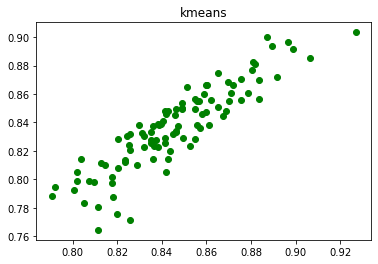

In [84]:
plt.scatter(banknocoltest,bankcoltest,c="g")
plt.title("kmeans")
plt.show()

# Summary for bank vs iris

"write a paragraph explaining whether they are the same or different, and why"

Visually the iris dataset has scatter plots above the diagonal line. 
While Bank is scattered along the line. The iris dataset has a small 150 amount of values compared to the bank dataset that consists of over 1000+ values. The cluster label tends to help, as there are more points above the diagonal than below it. For the iris data, it seems that the cluster label helped(red points). While it did not help in the bank dataset(Green points). In the bank dataset all the values are relatively the same, most likely because there is many many values. the difference is really apparent in small datasets.